<a href="https://colab.research.google.com/github/AnkurBhatt07/Retail-sales-prediction-regression-project/blob/main/Retail_sales_Prediction_regression_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -        Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**          - Ankur Bhatt    

# **Project Summary -**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently,
Rossmann store managers are tasked with predicting their daily sales for up to six
weeks in advance. Store sales are influenced by many factors, including promotions,
competition, school and state holidays, seasonality, and locality. With thousands of
individual managers predicting sales based on their unique circumstances, the
accuracy of results can be quite varied. You are provided with historical sales data for
1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note
that some stores in the dataset were temporarily closed for refurbishment.

The Retail Sales Prediction Project aims to develop a machine learning model to forecast sales for the retail company. The project leverages historical sales data and external factors to improve inventory management and optimize revenue. Expected outcomes include increased sales accuracy, reduced inventory costs, and improved customer satisfaction.

# **GitHub Link -**

https://github.com/AnkurBhatt07/Retail-sales-prediction-regression-project.git

# **Problem Statement**


**Write Problem Statement Here.**

Rossmann operates thousands of drug stores across Europe, and store managers are tasked with forecasting daily sales, a critical factor influenced by numerous variables, including promotions, competition, holidays, seasonality, and local factors. Inaccurate sales predictions leads to stockouts, overstocking, and increased holding costs. To address this issue, we aim to develop a robust machine learning model that leverages historical sales data and external factors to enhance sales forecasting accuracy and reduce inventory-related challenges.

#### **Define Your Business Objective?**

Improve sales forecasting accuracy .

Reduce overstock and stockout incidents .

Optimize inventory costs, resulting in reduction in holding costs.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,PowerTransformer
from sklearn.linear_model import LinearRegression,Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
stores_df = pd.read_csv('/content/drive/MyDrive/retail sales prediction csv files/Data & Resources/store.csv')
rossmann_df = pd.read_csv('/content/drive/MyDrive/retail sales prediction csv files/Data & Resources/Rossmann Stores Data.csv')

### Dataset First View

In [ ]:
stores_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
rossmann_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(stores_df.shape)
print(rossmann_df.shape)

(1115, 10)
(1017209, 9)


### Dataset Information

In [ ]:
# Dataset Info
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# 5 columns have high number of null values and CompetitionDistance column has 3 null values

In [ ]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# no missing values in this df

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
stores_df.duplicated().sum()

0

In [ ]:
rossmann_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
stores_df.isnull().sum().sum()

2343

In [ ]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<Axes: >

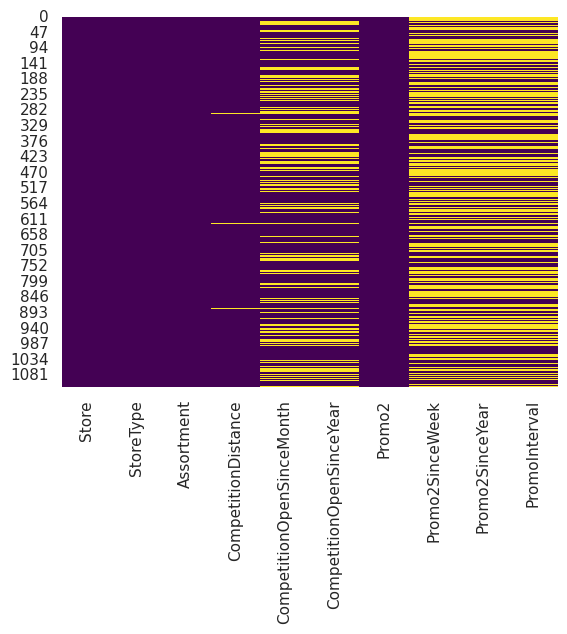

In [ ]:
# Visualizing the missing values
sns.heatmap(stores_df.isnull(),cbar = False,cmap = 'viridis')

# yellow lines represents missing values

<Axes: >

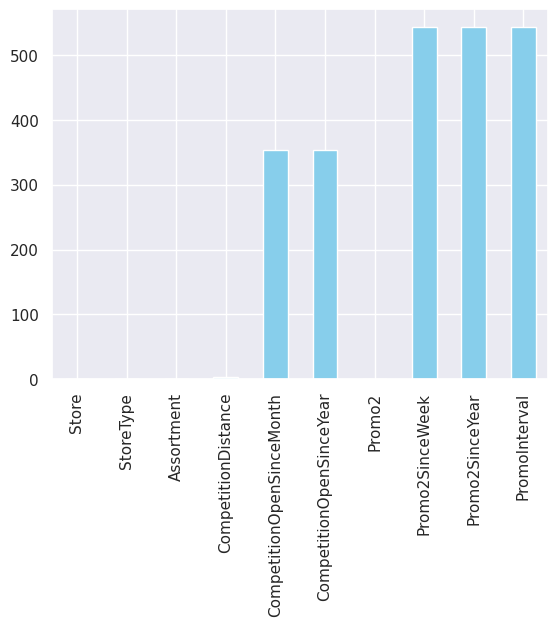

In [ ]:
stores_df.isnull().sum().plot(kind = 'bar',color = 'skyblue')


In [ ]:
for i in stores_df.columns:
  print(i)
  print(stores_df[i].value_counts())

Store
1       1
742     1
748     1
747     1
746     1
       ..
378     1
379     1
380     1
381     1
1115    1
Name: Store, Length: 1115, dtype: int64
StoreType
a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64
Assortment
a    593
c    513
b      9
Name: Assortment, dtype: int64
CompetitionDistance
250.0     12
1200.0     9
190.0      8
350.0      8
50.0       8
          ..
4490.0     1
8970.0     1
9720.0     1
5290.0     1
1880.0     1
Name: CompetitionDistance, Length: 654, dtype: int64
CompetitionOpenSinceMonth
9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64
CompetitionOpenSinceYear
2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0  

In [ ]:
for i in rossmann_df.columns:
  print(i)
  print(rossmann_df[i].value_counts())

Store
1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64
DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64
Date
2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64
Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64
Customers
0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4815         1
3998         1
4210         1
4920         1
4065         1
Name: Customers, Length: 4086, dtype: int64
Open
1    84439

### What did you know about your dataset?

We have two datasets namely stores_df and rossmann_df .

stores_df has 1115 rows containing information about different Rossmann Stores and there are 10 columns

rossmann_df is a bigger dataset which provides various features about the stores along with sales from the stores , the transaction date and multiple other information.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
stores_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Describe
stores_df.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [ ]:
rossmann_df.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


### Variables Description

Dataset Description

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

Data fields

The following are descriptions for the features of the datasets ::--

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates school holiday (1) or not (0)

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



### Check Unique Values for each variable.

In [ ]:
# creating a new dataset by merging the two datasets

new_df = rossmann_df.merge(stores_df, how = 'left' , on = 'Store')

In [ ]:
# Check Unique Values for each variable.
for i in new_df.columns:
  print(i)
  print(new_df[i].value_counts())

Store
1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64
DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64
Date
2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64
Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64
Customers
0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4815         1
3998         1
4210         1
4920         1
4065         1
Name: Customers, Length: 4086, dtype: int64
Open
1    84439

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# The stores performance in terms of sales

new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False)

# max total sales of a store is around 19.5 million.
# Least total sales of a Store is 2.1 million.


Store
262     19516842
817     17057867
562     16927322
1114    16202585
251     14896870
          ...   
263      2306075
208      2302052
198      2268273
543      2179287
307      2114322
Name: Sales, Length: 1115, dtype: int64

In [ ]:
# Stores based on customer footfall overall.

new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending=False)

# best customer influx is seen in store no 733 and 262 with total number of customer visiting is around 3.2 million.
# store no 543 is least performer based on customer visits with tot. no. of customer visiting around 187k

Store
733     3206058
262     3204694
562     2924960
769     2902351
1114    2509542
         ...   
702      215970
573      208622
254      201507
407      195715
543      187583
Name: Customers, Length: 1115, dtype: int64

In [ ]:
# DayofWeek value counts
new_df['DayOfWeek'].value_counts()

# The dataset contains almost equal entries for each DayofWeek

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [ ]:
# object datatype column.
new_df.Date.dtype

dtype('O')

In [ ]:
# changing the dtype of date column

new_df['Date'] = pd.to_datetime(new_df['Date'])

In [ ]:
# creating new columns from date column -- year , month , day

new_df['year'] = new_df['Date'].dt.year
new_df['month'] = new_df['Date'].dt.month
new_df['day'] = new_df['Date'].dt.day

In [ ]:
# dropping the date column

new_df.drop('Date',axis = 1,inplace = True)

In [ ]:
new_df['Open'].value_counts()

# The number of store closed observations is 1/5th of store open observations.

1    844392
0    172817
Name: Open, dtype: int64

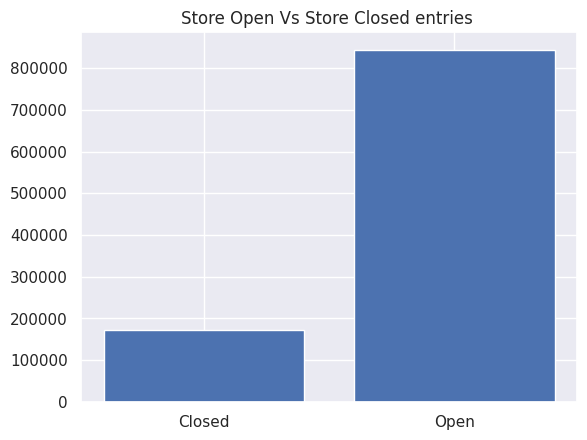

In [ ]:
# Store Open Vs Store Closed entries

plt.bar(new_df['Open'].value_counts().index , new_df['Open'].value_counts().values)
plt.title('Store Open Vs Store Closed entries ')
plt.xticks(new_df['Open'].value_counts().index, ['Open', 'Closed'])
plt.show()

In [ ]:
new_df[new_df['Open']==0]
# No sales in all these observations .


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
291,292,5,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN,2015,7,31
875,876,5,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov",2015,7,31
1406,292,4,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN,2015,7,30
1990,876,4,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov",2015,7,30
2521,292,3,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN,2015,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1
1017205,1112,2,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1
1017206,1113,2,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1
1017207,1114,2,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1


In [ ]:
new_df[new_df['Open']==0]['DayOfWeek'].value_counts().sort_index()
# 7 represent sunday , it is when most often stores are closed
# followed by thursday,friday.
# least store closure is seen in saturdays.

1      7170
2      1703
3      3729
4     11201
5      7205
6       672
7    141137
Name: DayOfWeek, dtype: int64

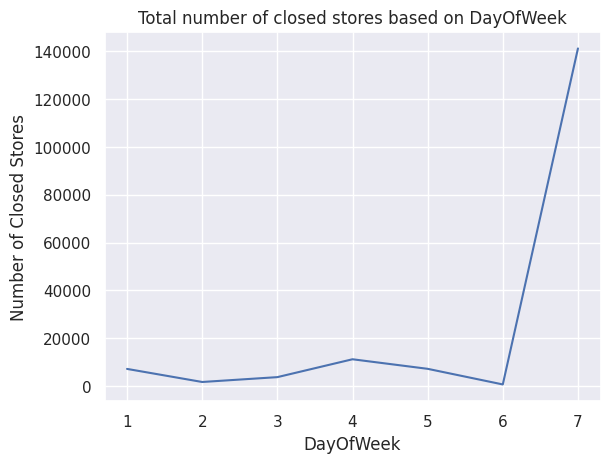

In [ ]:
# Total number of closed stores based on DayOfWeek
plt.plot(new_df[new_df['Open']==0]['DayOfWeek'].value_counts().sort_index().index , new_df[new_df['Open']==0]['DayOfWeek'].value_counts().sort_index().values)
plt.title('Total number of closed stores based on DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Number of Closed Stores')
plt.show()

In [ ]:
new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)]
# Observations providing info about stores ,and their sales, who were open on sundays .

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
5659,85,7,11421,1606,1,0,0,0,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN,2015,7,26
5696,122,7,5773,707,1,0,0,0,a,c,58260.0,4.0,2013.0,0,NaN,NaN,NaN,2015,7,26
5783,209,7,3742,354,1,0,0,0,a,c,11680.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,26
5833,259,7,15998,2857,1,0,0,0,b,b,210.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,26
5836,262,7,32547,4783,1,0,0,0,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN,2015,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011252,733,7,11226,2584,1,0,0,0,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,6
1011288,769,7,6995,1764,1,0,0,0,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,6
1011382,863,7,2067,255,1,0,0,0,a,c,21370.0,11.0,2010.0,0,NaN,NaN,NaN,2013,1,6
1011467,948,7,6024,1402,1,0,a,0,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,6


In [ ]:
# Stores based on their sale performance on sundays .
new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False)

Store
262     3812344
562     2543021
733     2029261
259     1954730
423     1807627
1097    1579436
85      1518961
676     1428960
769     1385776
948     1223835
494     1053291
335     1050436
682      974170
353      972216
274      854088
512      670396
578      515297
1081     514451
530      430381
1099     429940
453      378876
1045     313783
299      304991
122      265218
732      262286
310      238772
863      200546
209      176327
524      173632
867      154826
931      154064
433      105258
877       74237
Name: Sales, dtype: int64

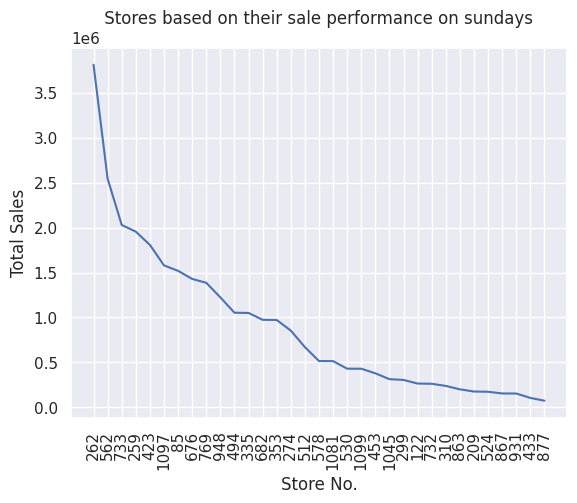

In [ ]:
plt.plot(np.arange(len(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False))),new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False).values)
plt.title(' Stores based on their sale performance on sundays ')
plt.xlabel('Store No.')
plt.ylabel('Total Sales')
plt.xticks(np.arange(len(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False))),new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False).index,rotation = 'vertical')
plt.show()

In [ ]:
# ids and total number of the few stores that are open on sundays
print(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)]['Store'].unique(),'\n')
print(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)]['Store'].nunique())

[  85  122  209  259  262  274  299  310  335  353  423  433  453  494
  512  524  530  562  578  676  682  732  733  769  863  867  931  948
 1045 1081 1097 1099  877] 

33


In [ ]:
new_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


In [ ]:
# Number of Open stores in each year
new_df.groupby('year')['Open'].sum()

# max number of rossman store were open in 2013 . Decreasing number of open stores represents loss in the company resulting in store closure.

year
2013    337943
2014    310417
2015    196032
Name: Open, dtype: int64

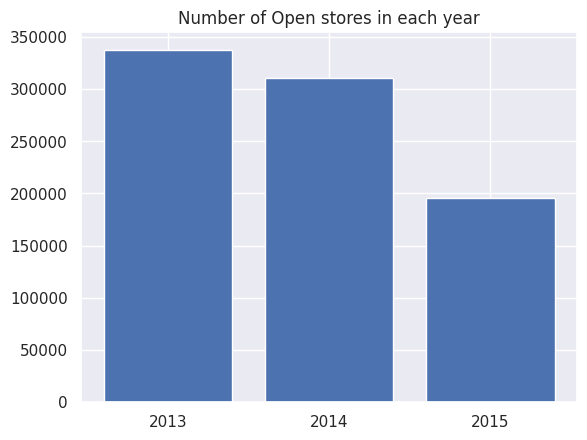

In [ ]:
plt.bar(new_df.groupby('year')['Open'].sum().index , new_df.groupby('year')['Open'].sum().values)
plt.title('Number of Open stores in each year')
plt.xticks(new_df.groupby('year')['Open'].sum().index)
plt.show()

In [ ]:
new_df['CompetitionOpenSinceYear'].value_counts().sort_index()

# 2012 and 2013 has the highest number of competing stores.

1900.0      758
1961.0      942
1990.0     4710
1994.0     1884
1995.0     1700
1998.0      942
1999.0     7352
2000.0     9236
2001.0    14704
2002.0    24882
2003.0    16794
2004.0    19804
2005.0    56564
2006.0    42802
2007.0    43744
2008.0    48476
2009.0    49396
2010.0    51258
2011.0    49396
2012.0    74299
2013.0    75426
2014.0    63732
2015.0    35060
Name: CompetitionOpenSinceYear, dtype: int64

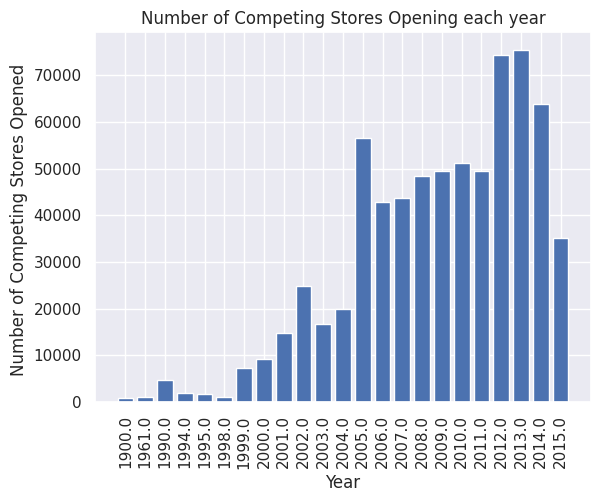

In [ ]:
plt.bar(np.arange(len(new_df['CompetitionOpenSinceYear'].value_counts().sort_index().index)) , new_df['CompetitionOpenSinceYear'].value_counts().sort_index().values)
plt.xticks(np.arange(len(new_df['CompetitionOpenSinceYear'].value_counts().sort_index().index)),new_df['CompetitionOpenSinceYear'].value_counts().sort_index().index,rotation = 'vertical')
plt.title('Number of Competing Stores Opening each year')
plt.xlabel("Year")
plt.ylabel('Number of Competing Stores Opened ')
plt.show()

In [ ]:
new_df['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [ ]:
new_df.groupby(['StoreType'])['Promo'].sum()

# Most promo were done by storeType a

StoreType
a    210504
b      6046
c     52244
d    119286
Name: Promo, dtype: int64

<BarContainer object of 4 artists>

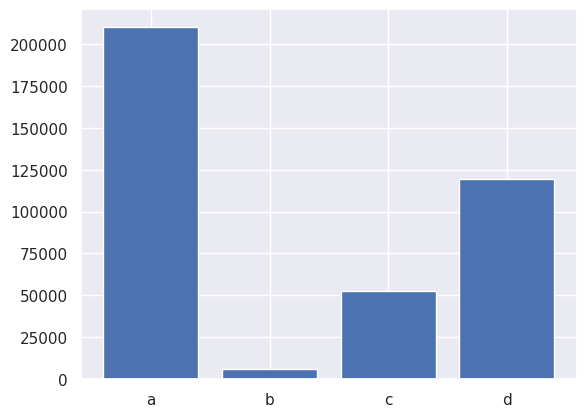

In [ ]:
plt.bar(new_df.groupby(['StoreType'])['Promo'].sum().index , new_df.groupby(['StoreType'])['Promo'].sum().values)

In [ ]:
new_df.groupby(['Assortment'])['Promo'].sum()

# Most Promo were done by Stores with Assortment a

Assortment
a    204970
b      3166
c    179944
Name: Promo, dtype: int64

<BarContainer object of 3 artists>

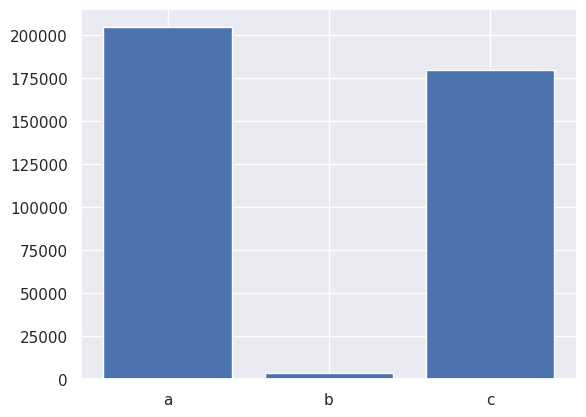

In [ ]:
plt.bar(new_df.groupby(['Assortment'])['Promo'].sum().index , new_df.groupby(['Assortment'])['Promo'].sum().values)

In [ ]:
new_df.groupby(['SchoolHoliday'])['Open'].sum()

# very few stores are open on school holidays.

SchoolHoliday
0    680935
1    163457
Name: Open, dtype: int64

Text(0.5, 0, 'school holiday')

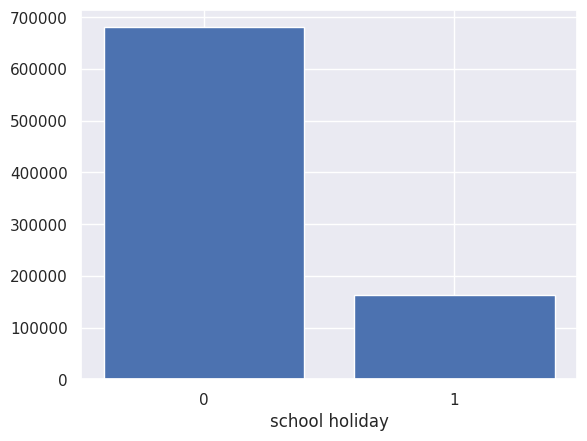

In [ ]:
plt.bar(['0','1'] , new_df.groupby(['SchoolHoliday'])['Open'].sum().values)
plt.xlabel('school holiday')

In [ ]:
new_df['StateHoliday'].value_counts()

# Two different categories of 0 present .

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# since a,b,c represent holiday ,we will replace them by 1 and others with 0

new_df['StateHoliday'] = np.where((new_df['StateHoliday'] == 0) | (new_df['StateHoliday'] == '0'),0 ,1)

In [ ]:
new_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


In [ ]:
new_df.groupby(['StateHoliday'])['Open'].sum()

# Very few stores are open on holidays

StateHoliday
0    843482
1       910
Name: Open, dtype: int64

<BarContainer object of 2 artists>

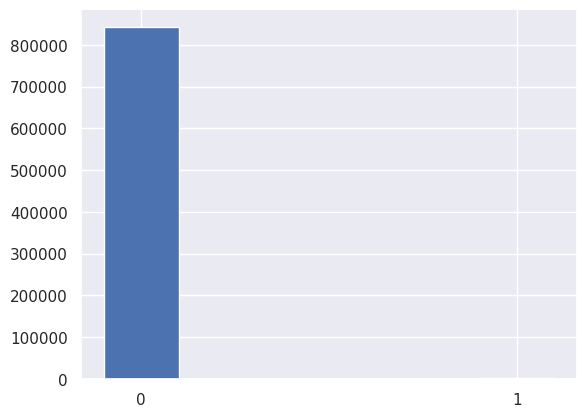

In [ ]:
plt.bar(['0','1'],new_df.groupby(['StateHoliday'])['Open'].sum().values , width = 0.2)

In [ ]:
new_df.groupby('Store')['Open'].sum()

# Frequency of each store being Open based on data.

Store
1       781
2       784
3       779
4       784
5       779
       ... 
1111    779
1112    779
1113    784
1114    784
1115    781
Name: Open, Length: 1115, dtype: int64

In [ ]:
new_df.groupby('year')['Sales'].sum()

# Total Sales for each year

year
2013    2302876084
2014    2180804896
2015    1389499643
Name: Sales, dtype: int64

([<matplotlib.axis.XTick at 0x7c4ae552cdf0>,
 [Text(2013, 0, '2013'), Text(2014, 0, '2014'), Text(2015, 0, '2015')])

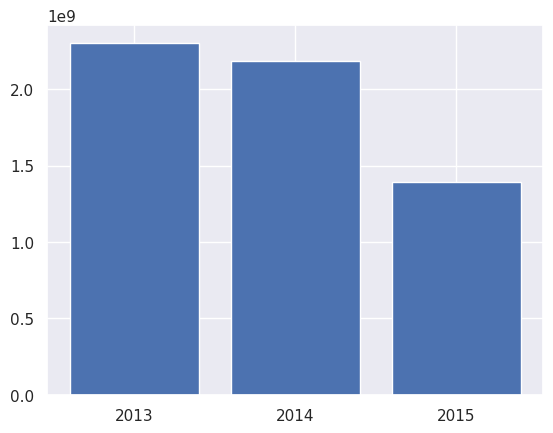

In [ ]:
plt.bar(new_df.groupby('year')['Sales'].sum().index , new_df.groupby('year')['Sales'].sum().values)
plt.xticks(new_df.groupby('year')['Sales'].sum().index)

In [ ]:
new_df.groupby('month')['Sales'].sum()

# Total Sales for each month.March tops the list, followed by July.

month
1     566728724
2     528734410
3     599831906
4     575895295
5     569248217
6     578112775
7     595059205
8     361791202
9     342570131
10    351878728
11    369498877
12    433831153
Name: Sales, dtype: int64

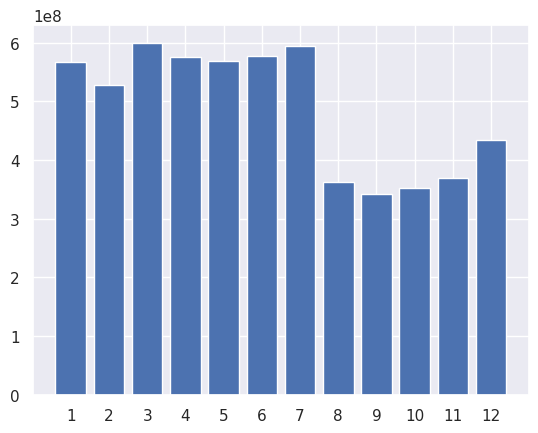

In [ ]:
plt.bar(new_df.groupby('month')['Sales'].sum().index , new_df.groupby('month')['Sales'].sum().values)
plt.xticks(new_df.groupby('month')['Sales'].sum().index)
plt.show()

In [ ]:
new_df.groupby('DayOfWeek')['Sales'].sum()

# total Sales based on DayOfWeek . Mondays have the highest sales and Sundays have lowest sales.

DayOfWeek
1    1130203012
2    1020411930
3     954962863
4     911177709
5     980555941
6     846317735
7      29551433
Name: Sales, dtype: int64

<BarContainer object of 7 artists>

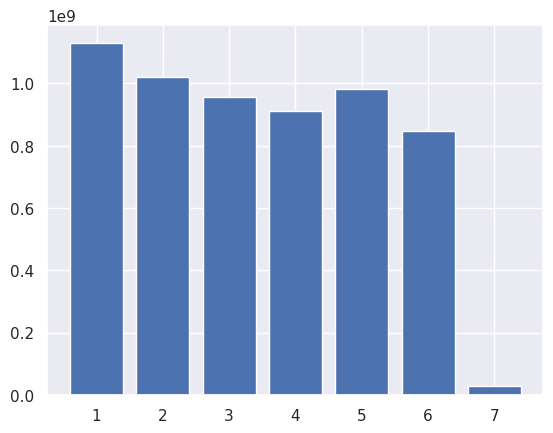

In [ ]:
plt.bar(new_df.groupby('DayOfWeek')['Sales'].sum().index , new_df.groupby('DayOfWeek')['Sales'].sum().values)

In [ ]:
new_df.groupby('day')['Sales'].sum()

# Total Sales in each day of month.

day
1     155983560
2     233513169
3     194582812
4     228301010
5     212869176
6     197094539
7     201380487
8     189718770
9     175922427
10    181039363
11    183373089
12    174242021
13    192254717
14    180183130
15    195262955
16    213593069
17    205070891
18    213308167
19    195100959
20    195546908
21    182630806
22    183172786
23    190009101
24    166601783
25    161519579
26    161973928
27    194264879
28    196952797
29    177114239
30    219939617
31    120659889
Name: Sales, dtype: int64

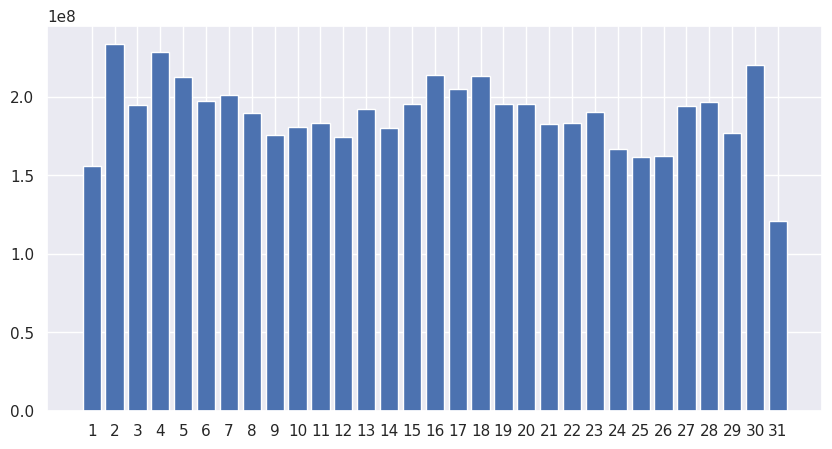

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(new_df.groupby('day')['Sales'].sum().index ,new_df.groupby('day')['Sales'].sum().values )
plt.xticks(new_df.groupby('day')['Sales'].sum().index)
plt.show()

# more or less like uniform dist.

In [ ]:
new_df.loc[(new_df['Sales'] == 0) & new_df['Open'] == 1]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
86825,971,5,0,0,1,0,0,1,c,a,1140.0,5.0,2011.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec",2015,5,15
142278,674,4,0,0,1,0,0,0,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov",2015,3,26
196938,699,4,0,0,1,1,0,0,a,a,180.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct",2015,2,5
322053,708,3,0,0,1,1,0,0,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct",2014,10,1
330176,357,1,0,0,1,0,0,0,a,a,2060.0,10.0,2008.0,0,NaN,NaN,NaN,2014,9,22
340348,227,4,0,0,1,0,0,0,a,a,2370.0,NaN,NaN,0,NaN,NaN,NaN,2014,9,11
340860,835,4,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",2014,9,11
341795,835,3,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",2014,9,10
346232,548,5,0,0,1,1,0,1,d,c,3760.0,2.0,2009.0,0,NaN,NaN,NaN,2014,9,5
346734,28,4,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec",2014,9,4


In [ ]:
new_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
new_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


In [ ]:
new_df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2      

### What all manipulations have you done and insights you found?

Manipulations Done --

1 - changing the dtype of date column

2 - creating new columns from date column -- year , month , day

3 - dropping the date column

 4 - StateHoliday column contains two unique 0 values referring to No state Holiday .   Replacing both 0 categories with 'None' to give proper representation .

Insights Found::--


max total sales of a store is around 19.5 million.
Least total sales of a Store is 2.1 million.
 The number of store closed observations is 1/5th of store open observations.

 most often stores are closed on sundays
 followed by thursday,friday.
 least store closure is seen in saturdays.

there are only few stores who are open on sundays .

 max number of rossman store were open in 2013 . Decreasing number of open stores represents loss in the company resulting in store closure.

2012 and 2013 has the highest number of competing stores.

 Most stores are open when there are no holidays .

 Total Sales for each month.March tops the list, followed by July.

 total Sales based on DayOfWeek . Mondays have the highest sales and Sundays have lowest sales.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

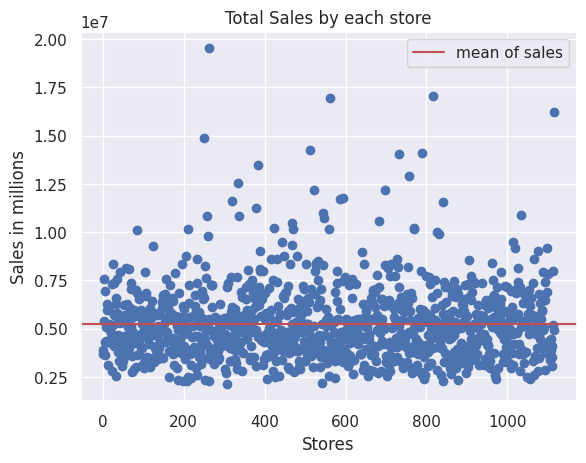

In [ ]:
plt.scatter(new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False).index,new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False).values)
plt.axhline(np.mean(new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False).values),color = 'r',label = 'mean of sales')
plt.title('Total Sales by each store')
plt.xlabel('Stores')
plt.ylabel('Sales in millions')
plt.legend()

##### 1. Why did you pick the specific chart?

The chart shows the mean of overall sales . The shows the number of outperforming stores.The chart shows the overall distribution of sales for all stores.

##### 2. What is/are the insight(s) found from the chart?

The mean value of sales is around 500,000 .

Majority of stores of total sales in the range of 250,000 to 750,000

We have few outperforming store who have total sales greater than even 1 million .

The max value of total sales of a store is around 2 million.

#### Chart - 2

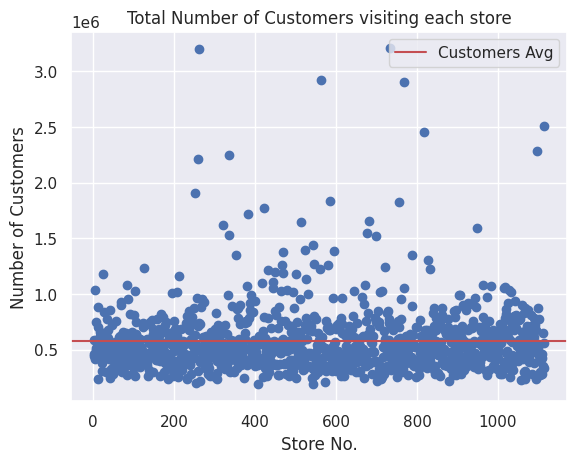

In [ ]:
plt.scatter(new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending=False).index , new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending=False).values)
plt.axhline(np.mean(new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending = False).values),color = 'r',label = 'Customers Avg')
plt.title('Total Number of Customers visiting each store')
plt.xlabel('Store No.')
plt.ylabel('Number of Customers')
plt.legend()

##### 2. What is/are the insight(s) found from the chart?

the mean number of customers visiting each store is around 60,000

the best performing stores have the customers visiting around 3.5 lakhs.However the most stores are having customer visits in range of 25000 to 75000.

#### Chart - 3

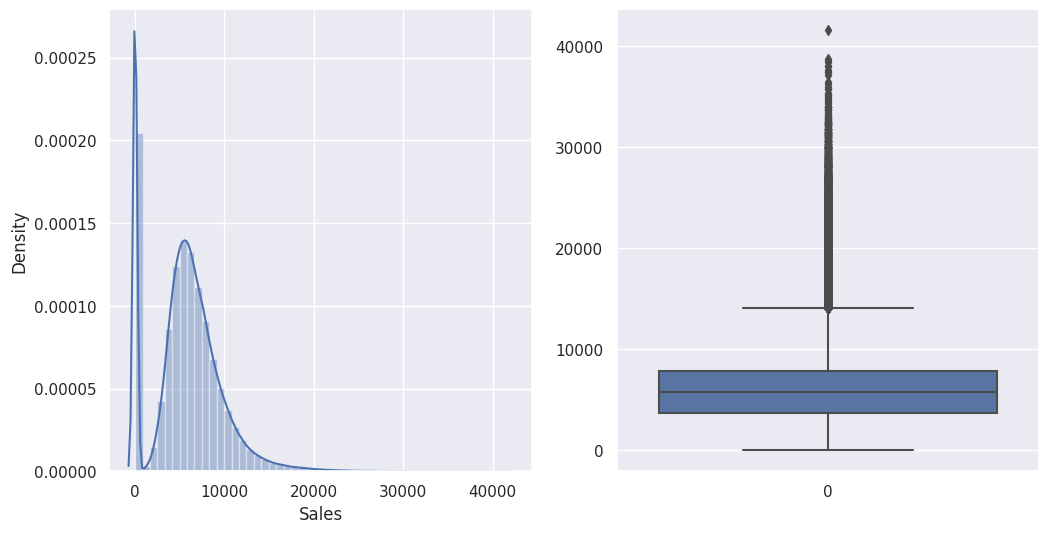

In [ ]:
# analysis of dependent variable -- Sales
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(new_df['Sales'])
plt.subplot(1,2,2)
sns.boxplot(new_df['Sales'])
plt.show()

##### 1. Why did you pick the specific chart?

Distribution plot provides the distribution of the data . we get to know about the skewness of the data . While the box plot visualizes the median ,iqr and outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

Sales column is Right skewed with it peak at around 5000 - 6000 range . There is high number of 0 sales observations which caused the spike at 0 .

There are high number of outliers in sales showing very high sales value . This means that some stores are exceptionally profitable.

In [ ]:
# dropping the store column
new_df.drop('Store',axis = 1 , inplace = True)

In [ ]:
y = new_df['Sales']
X = new_df.drop('Sales',axis = 1)

In [ ]:
X.isnull().sum()

DayOfWeek                         0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
dtype: int64

In [ ]:
new_df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'year', 'month',
       'day'],
      dtype='object')

In [ ]:
# univariate analysis.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Sales                      1017209 non-null  int64  
 2   Customers                  1017209 non-null  int64  
 3   Open                       1017209 non-null  int64  
 4   Promo                      1017209 non-null  int64  
 5   StateHoliday               1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   StoreType                  1017209 non-null  object 
 8   Assortment                 1017209 non-null  object 
 9   CompetitionDistance        1014567 non-null  float64
 10  CompetitionOpenSinceMonth  693861 non-null   float64
 11  CompetitionOpenSinceYear   693861 non-null   float64
 12  Promo2                     1017209 non-null  int64  
 13  Promo2SinceW

In [ ]:
numerical_col = []
categorical_col = []
for col in X.columns:
  if (new_df[col].dtype == int) | (new_df[col].dtype == float):
    numerical_col.append(col)
  else:
    categorical_col.append(col)

In [ ]:
numerical_col

['DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'year',
 'month',
 'day']

In [ ]:
categorical_col

['StoreType', 'Assortment', 'PromoInterval']

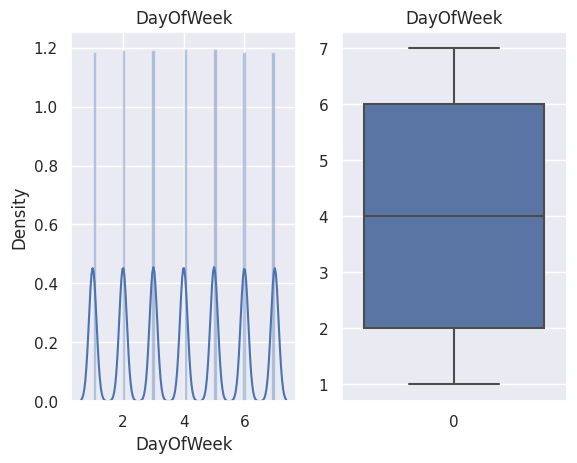

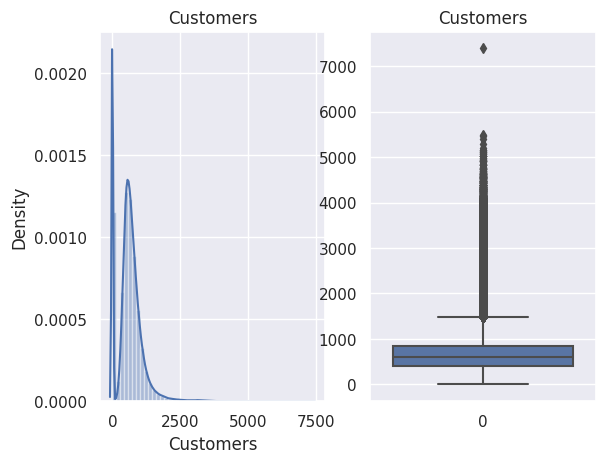

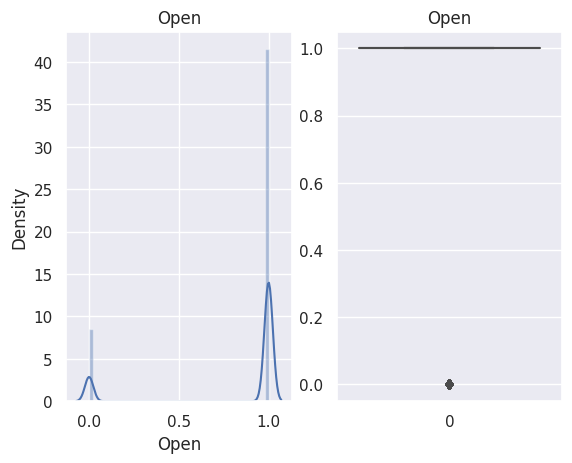

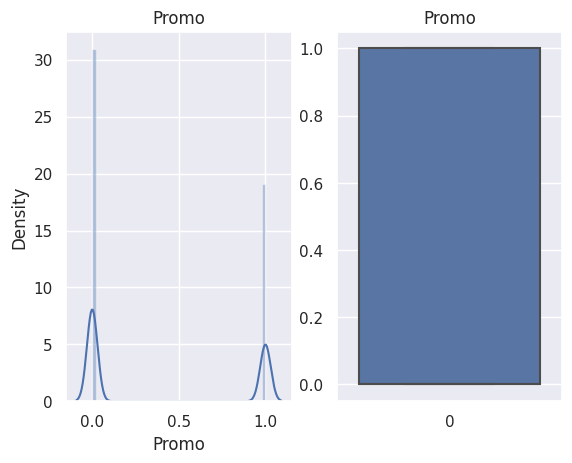

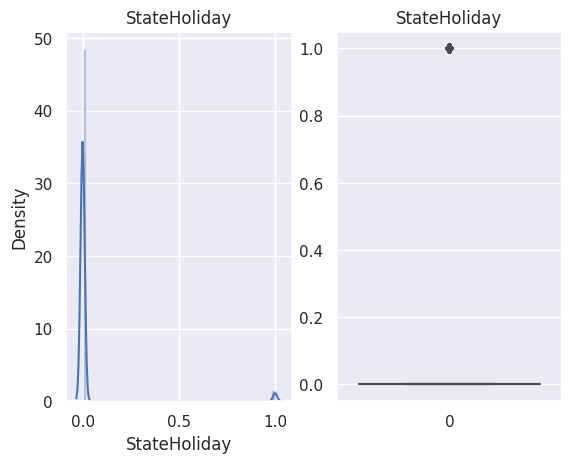

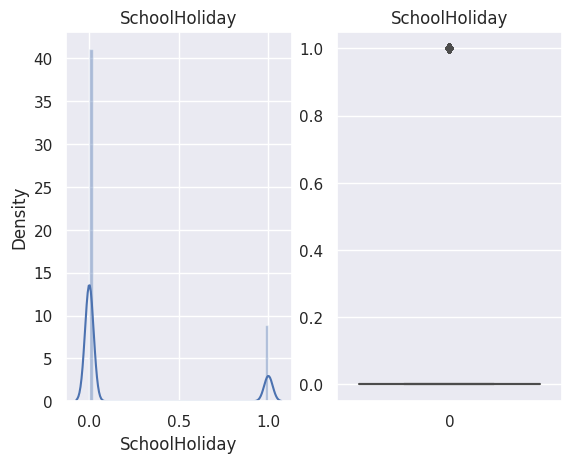

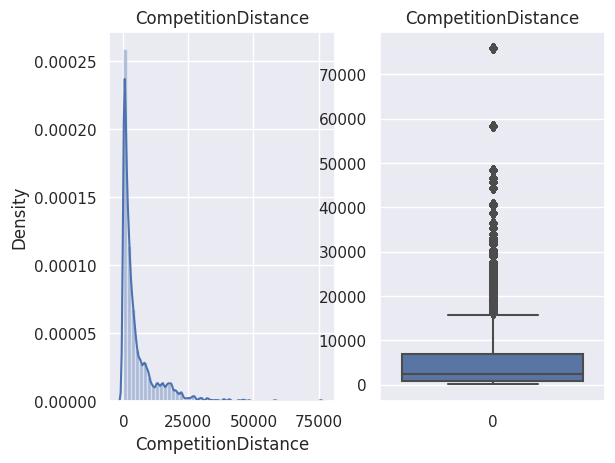

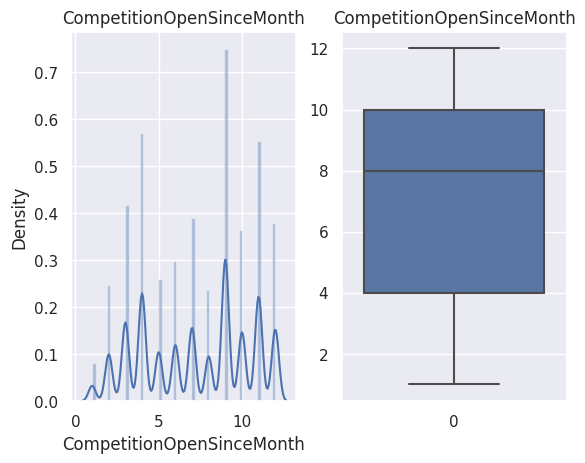

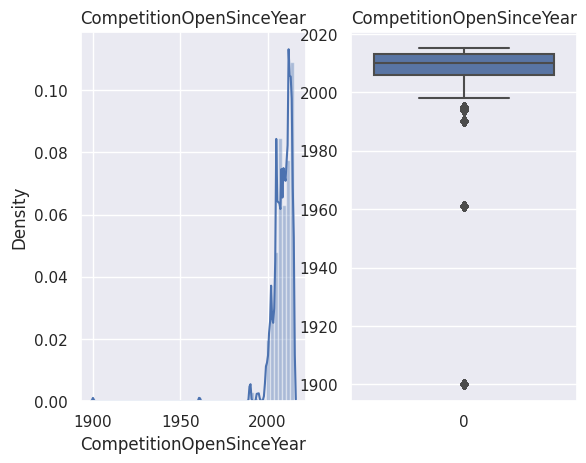

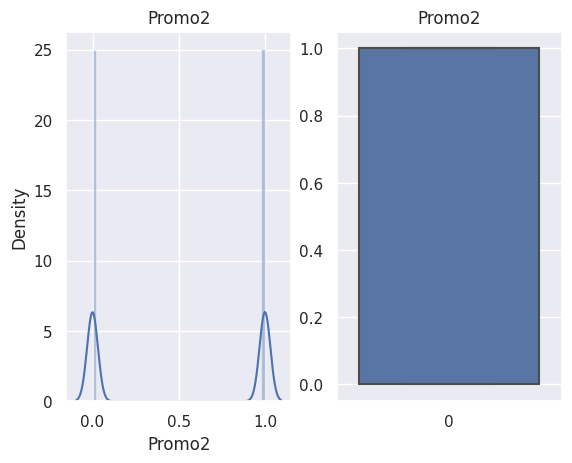

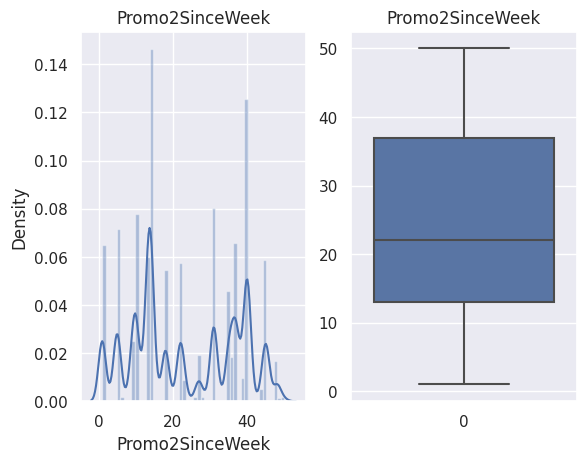

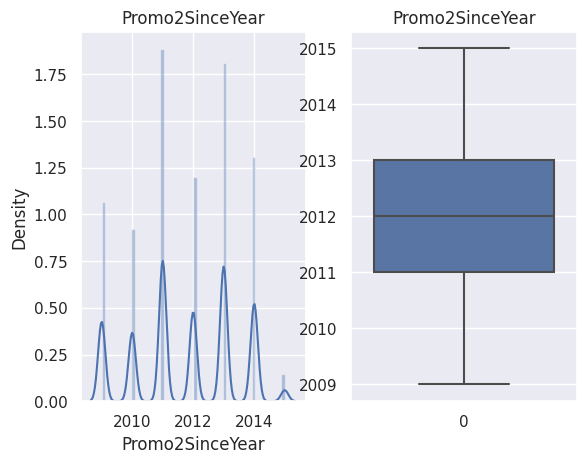

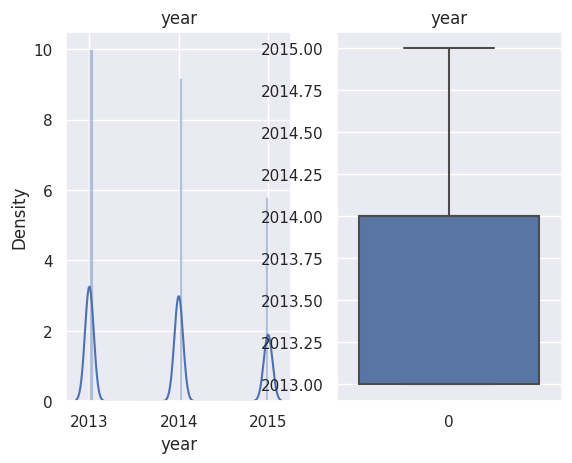

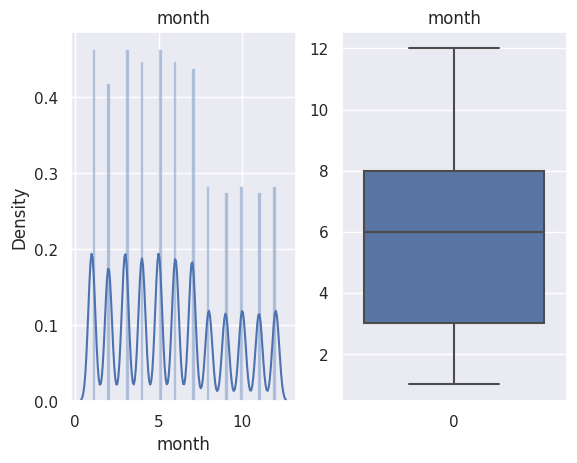

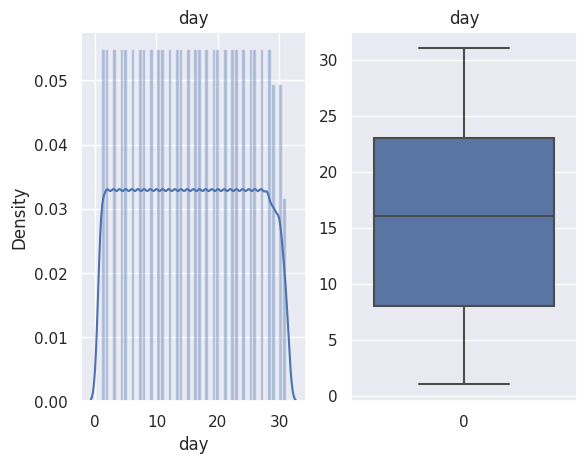

In [ ]:
for col in numerical_col:
  plt.subplot(1,2,1)
  sns.distplot(new_df[col])
  plt.title(col)
  plt.subplot(1,2,2)
  sns.boxplot(new_df[col])
  plt.title(col)
  plt.show()

##### 2. What is/are the insight(s) found from the chart?

DayOfWeek column had almost equal number of each day . obviously has no outliers as well.

Customers column has peak around 1000 . it is positively skewed and has a significant number of outliers .

Open has two unique values 0 and 1 and majority of values are 1 indicating open store

Promo also has 2 values . majorly 1 but 0 here also significantly high.

StateHoliday has 2 values . majorly 0 and 1 in very low number .indicating very few observations with stateholiday.

School holiday also majorly has 0 values indicating working day for school.

Competition distance has peak around 3000 with significant number of outliers.

CompetitionOpenSinceYear is left skewed . Majority of the values are in range of 2000 to 2020 . very few in 90s .

Month column shows that first 7 months have more sales .

#### Chart - 5

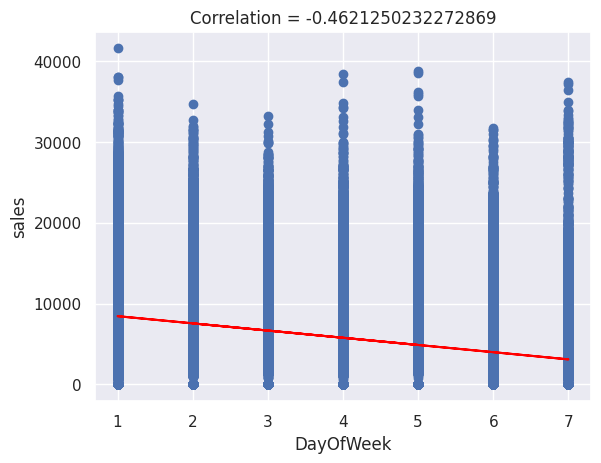

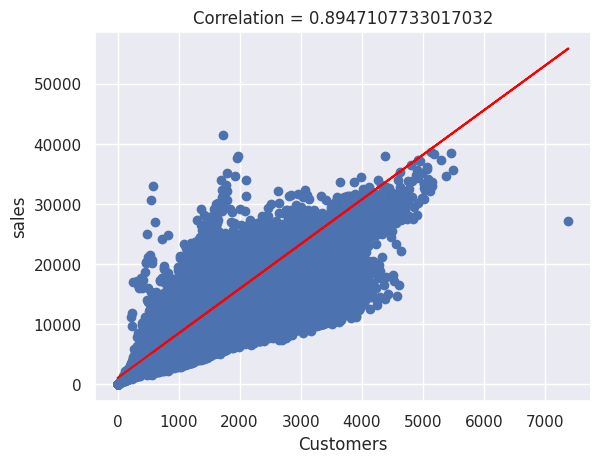

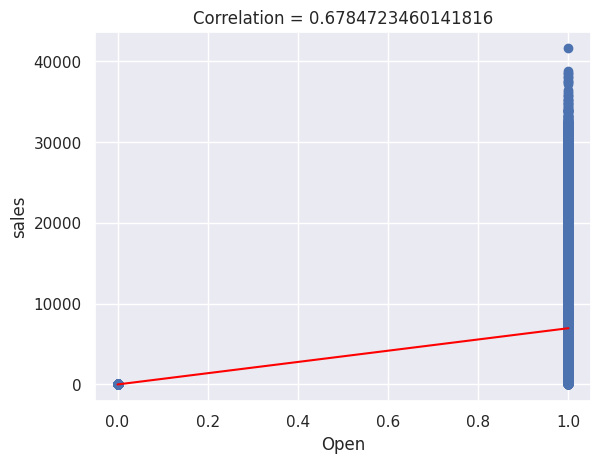

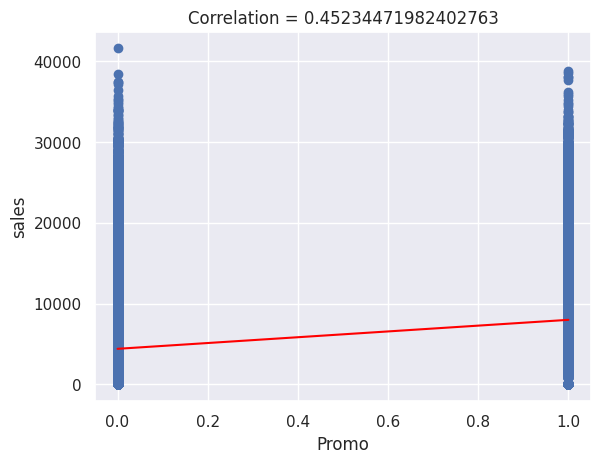

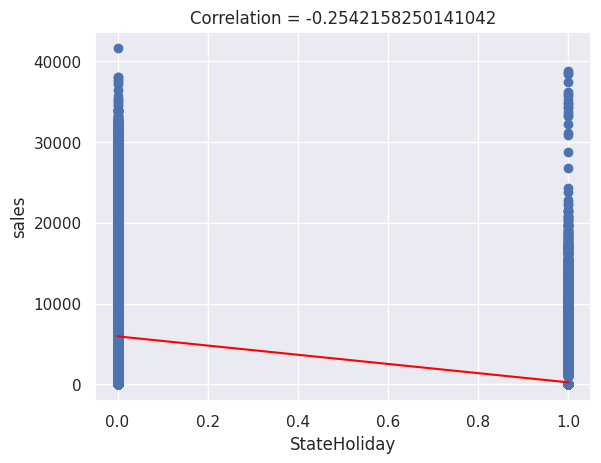

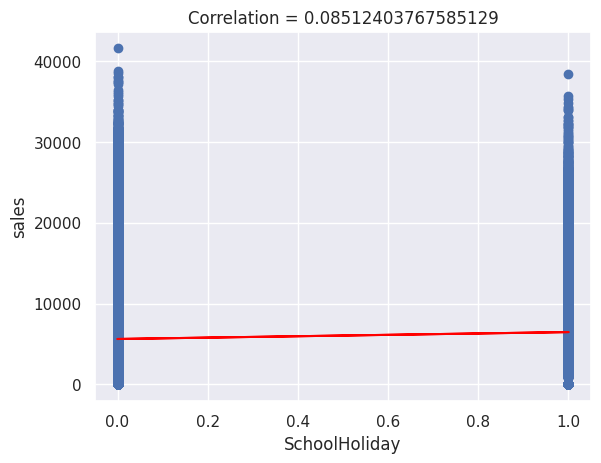

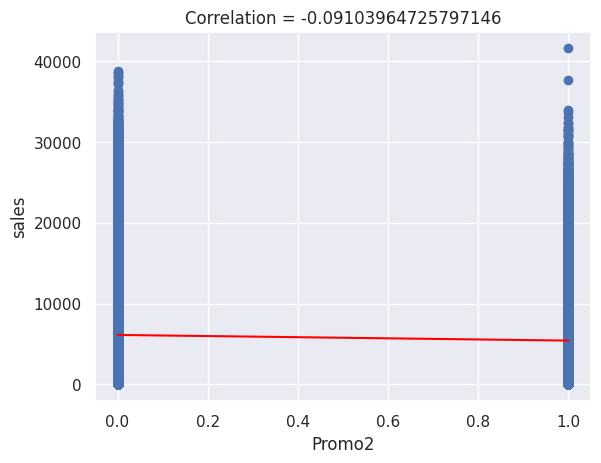

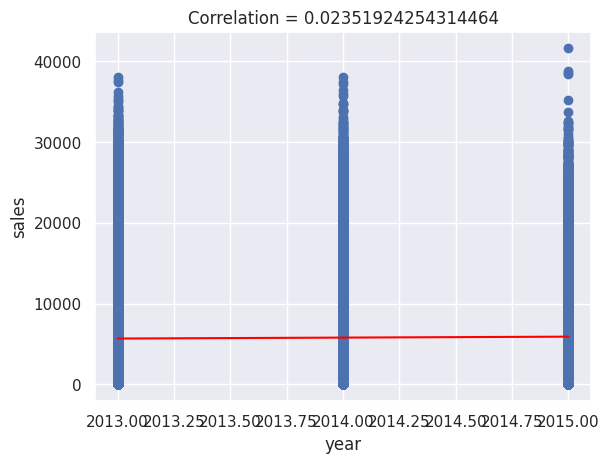

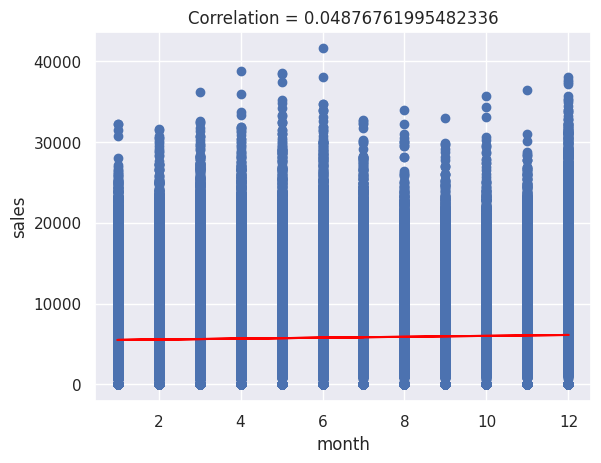

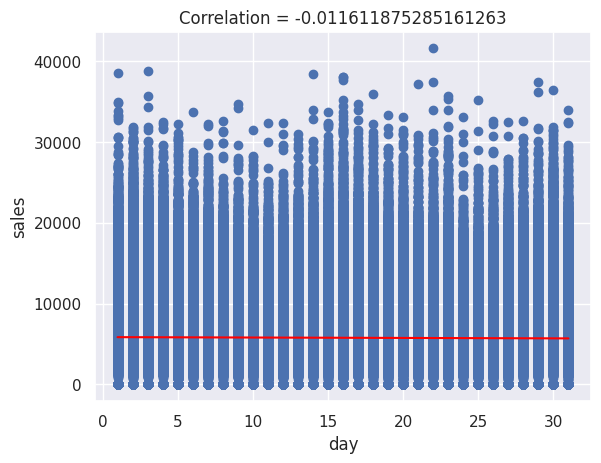

In [ ]:
# bivariate analysis of continuous cols without null values .

for i in numerical_col:
  if new_df[i].isnull().sum() == 0:
    plt.scatter(new_df[i],new_df['Sales'])
    z = np.polyfit(new_df[i] , new_df['Sales'],1)
    yhat = np.poly1d(z)(new_df[i])
    plt.plot(new_df[i],yhat , color = 'red')
    plt.xlabel(i)
    plt.ylabel('sales')
    corr = new_df[i].corr(new_df['Sales'])
    plt.title(f'Correlation = {corr}')
    plt.show()

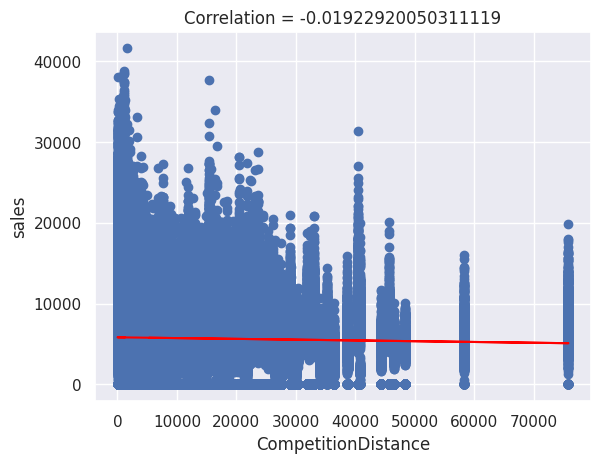

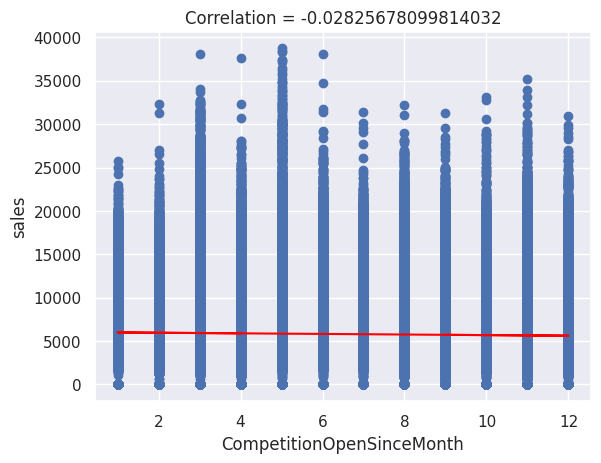

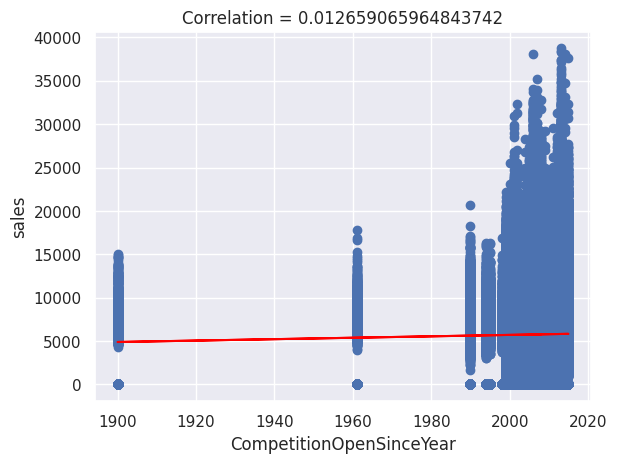

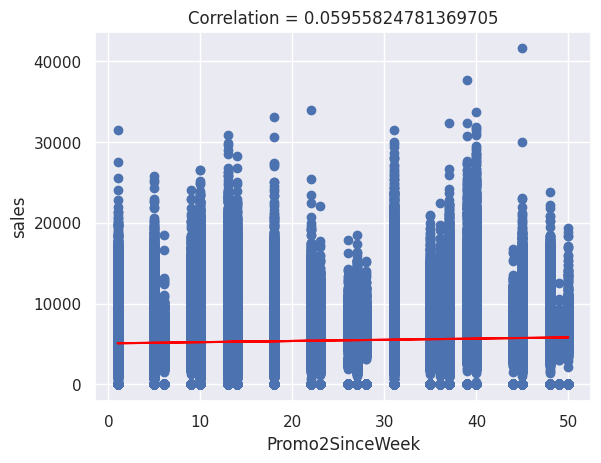

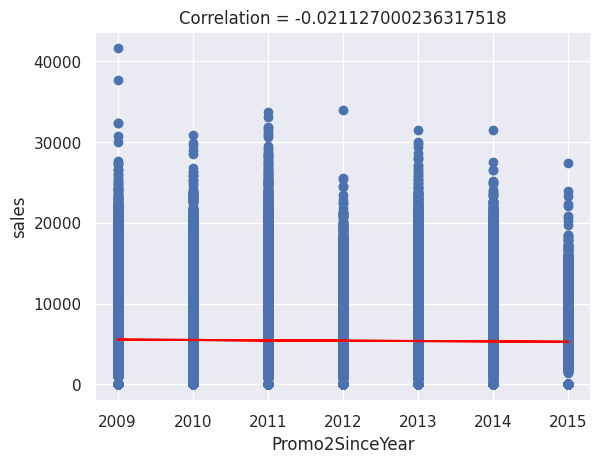

In [ ]:
# bivariate analysis of continuous cols with null values

for col in numerical_col:
  if new_df[col].isnull().sum() != 0:
    data = new_df.dropna(subset = [col , 'Sales'])
    plt.scatter(data[col] , data['Sales'])
    z = np.polyfit(data[col] , data['Sales'],1)
    yhat = np.poly1d(z)(data[col])
    plt.plot(data[col],yhat , color = 'red')
    corr = data[col].corr(data['Sales'])
    plt.title(f'Correlation = {corr}')
    plt.xlabel(col)
    plt.ylabel('sales')
    plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots give the relationship direction btw dependent and independent variables . This gave the overview relation btw continuous and dep. var.

##### 2. What is/are the insight(s) found from the chart?

1 - we see +ve linear relationship btw customers and sales . which is very obvious

2 -- negative correlation for increasing day of week indicates that the sales is higher on the start of the week and then decreases with increasing day.least on sundays.

3 -- On giving promo , the sales tends to increase .
4 -- however on giving promo2 , not much increasing effect on sales is seen .
5 -- On holidays sales tends to decrease and same with closed stores which is obvious.

#### Chart - 6

In [ ]:
new_df[categorical_col].isnull().sum()

StoreType             0
Assortment            0
PromoInterval    508031
dtype: int64

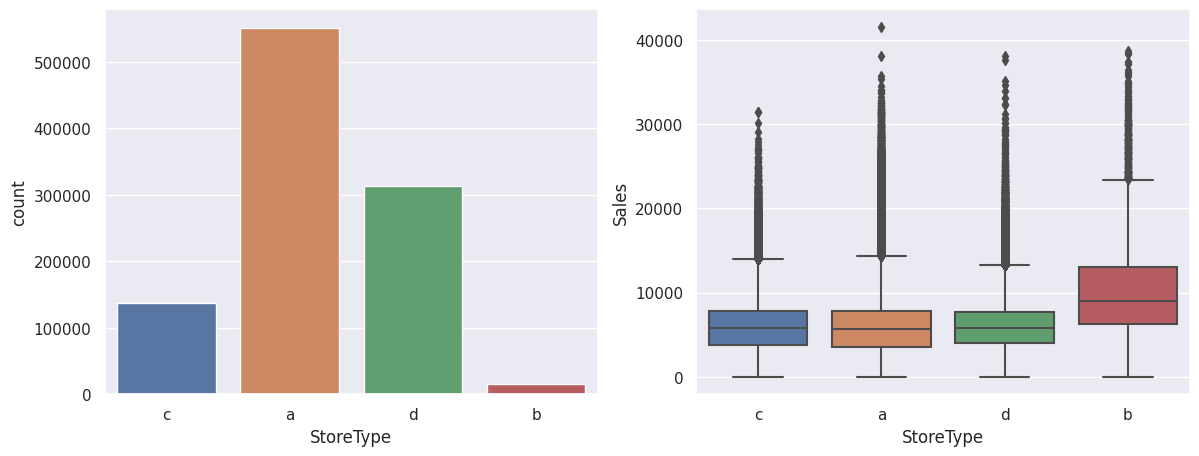

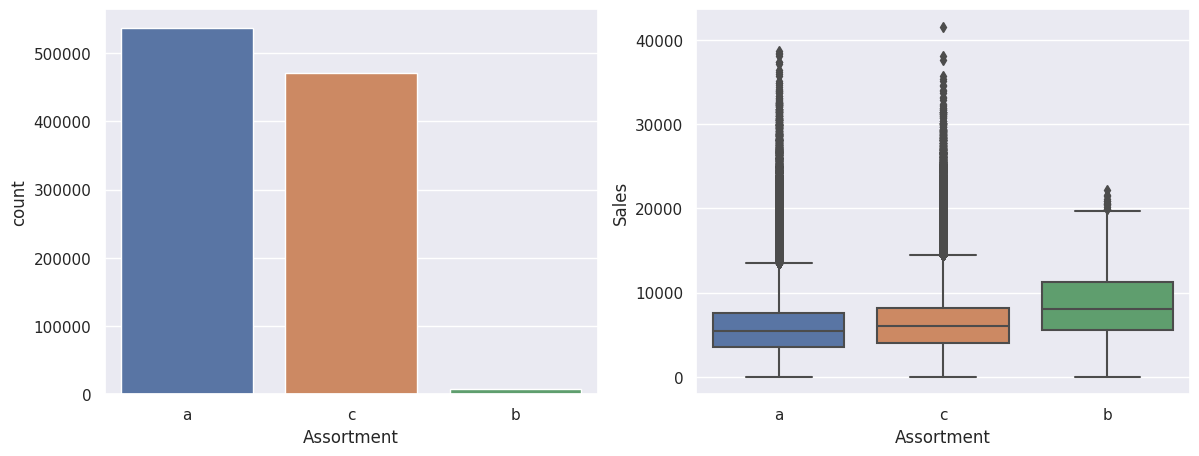

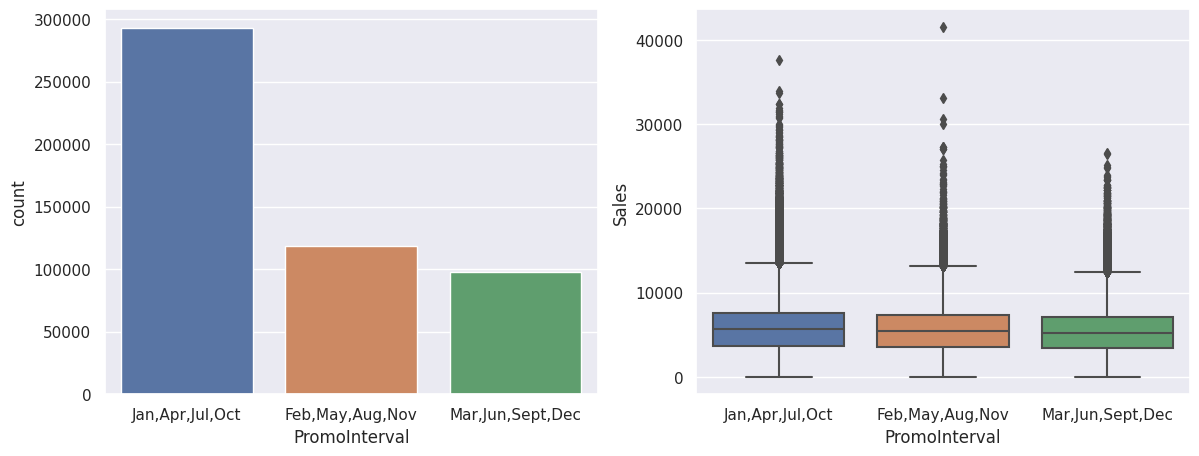

In [ ]:
# analysis of categorical columns

for i in categorical_col:
  plt.figure(figsize = (14,5))
  plt.subplot(1,2,1)
  sns.countplot(x = i , data = new_df)
  plt.subplot(1,2,2)
  sns.boxplot(x = i ,y = 'Sales' , data = new_df)
  plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

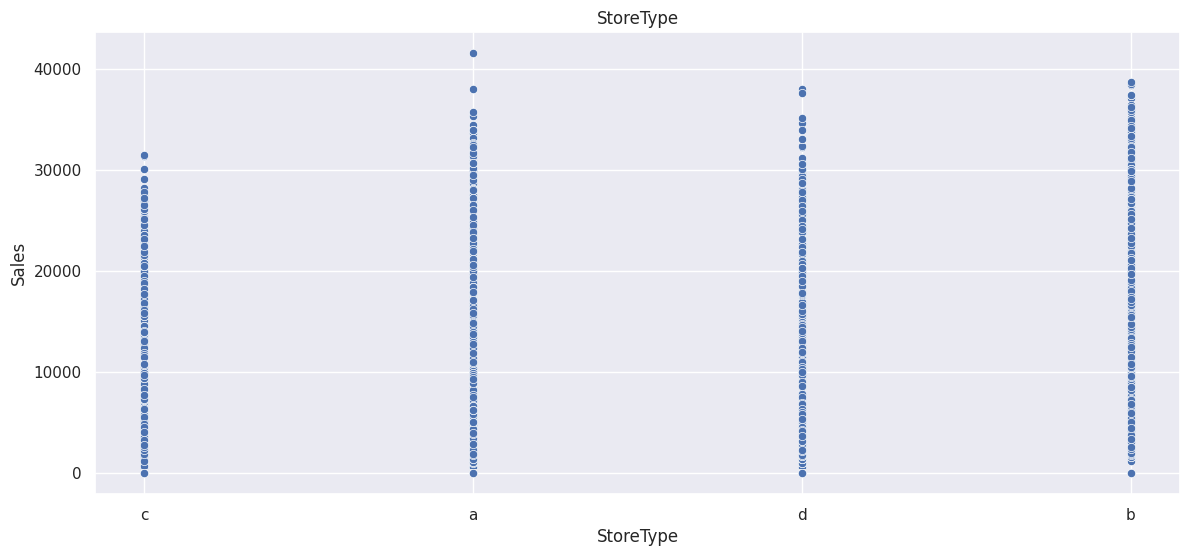

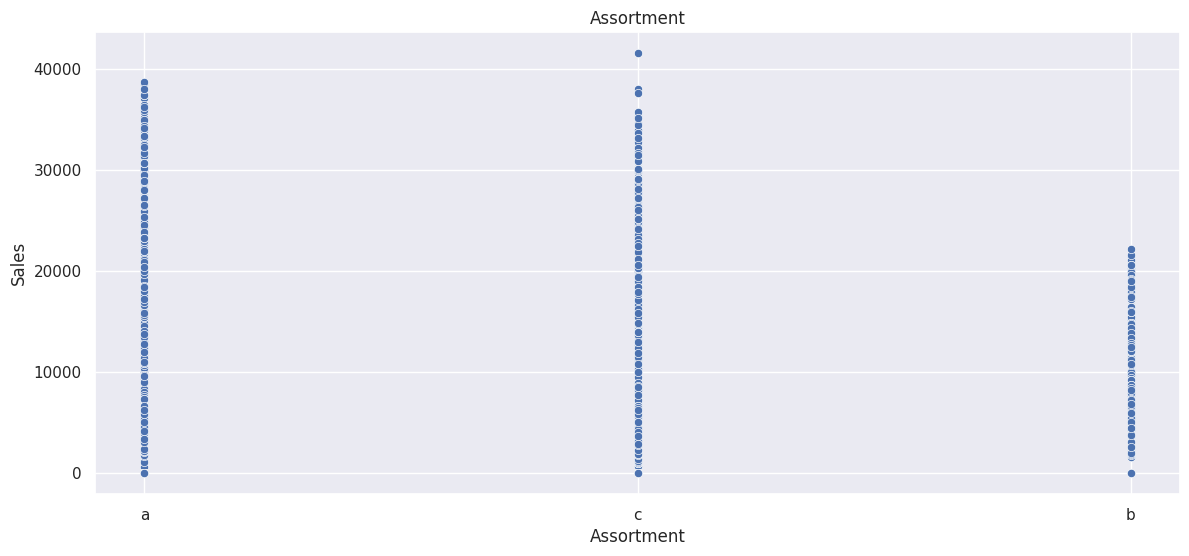

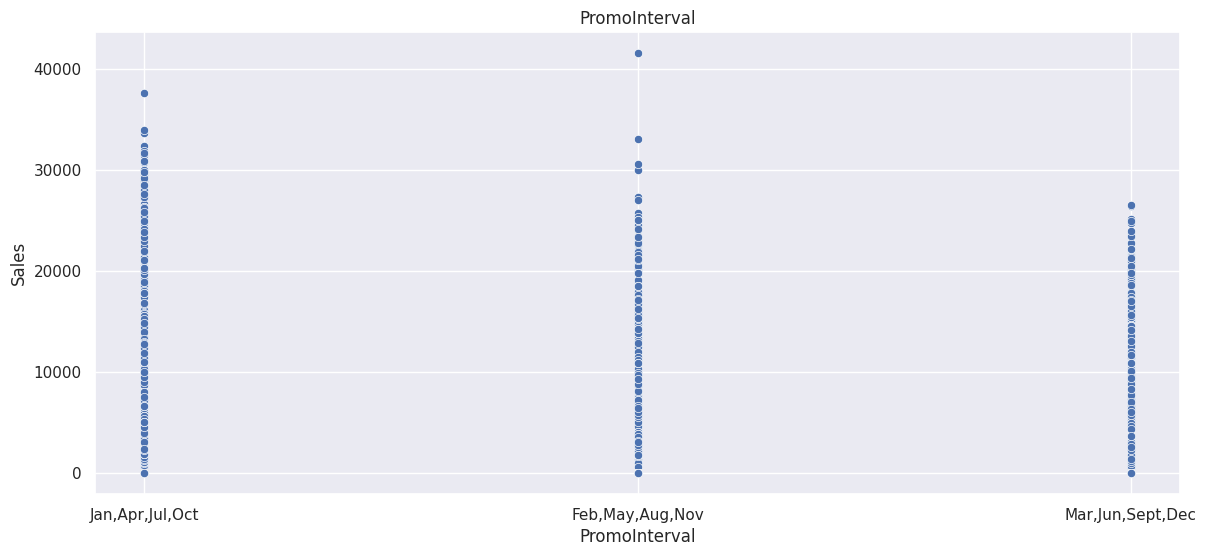

In [ ]:
# bivariate analysis discrete numerical cols

for i in categorical_col :
  plt.figure(figsize = (14,6))
  sns.scatterplot(x= i ,y = 'Sales', data = new_df)
  plt.title(i)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: xlabel='DayOfWeek', ylabel='count'>

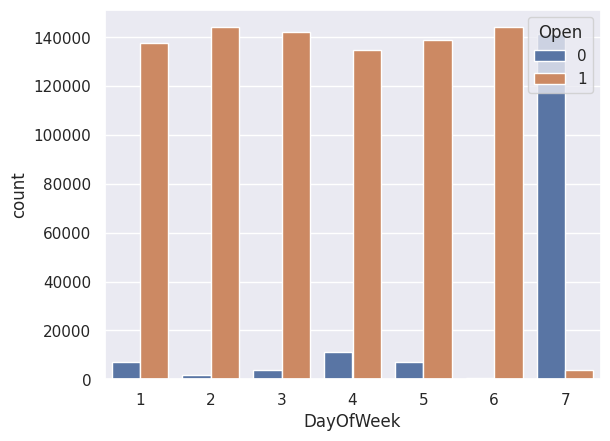

In [ ]:
sns.countplot(x='DayOfWeek',hue='Open',data=new_df)
# As we can see that in the graph given below that Stores mainly closed on Sunday

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<Axes: xlabel='Promo', ylabel='Sales'>

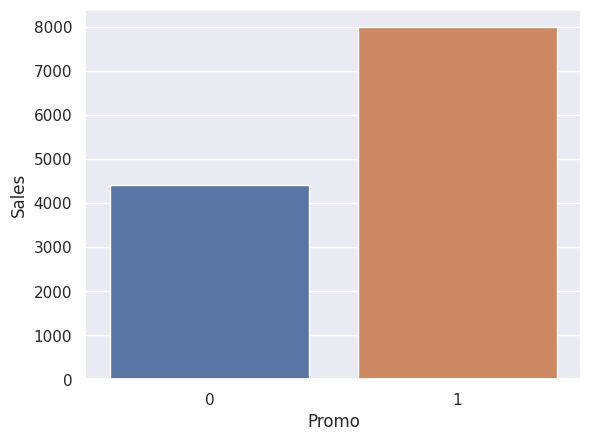

In [ ]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(new_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

# Sales Are nearly doubled High When Promo is Running

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Axes: xlabel='Promo'>

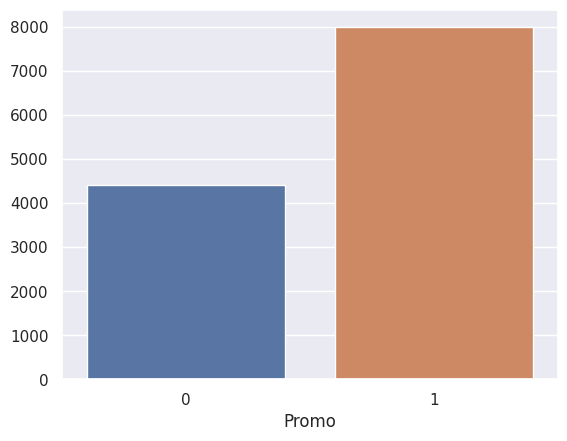

In [ ]:
new_df.groupby('Promo')['Sales'].mean()
sns.barplot(x = new_df.groupby('Promo')['Sales'].mean().index , y = new_df.groupby('Promo')['Sales'].mean().values)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

In [ ]:
new_df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'year', 'month',
       'day'],
      dtype='object')

In [ ]:
numerical_col

['DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'year',
 'month',
 'day']

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : feature is normally distributed

H1 : features is not normally distributed.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import shapiro
for col in numerical_col :
  print('shapiro wilk test for ',col ,  '----' , shapiro(new_df[col].dropna()))

  # the columns having pvalue greater than 0.05 are normally distributed

shapiro wilk test for  DayOfWeek ---- ShapiroResult(statistic=0.923979640007019, pvalue=0.0)
shapiro wilk test for  Customers ---- ShapiroResult(statistic=0.8789712190628052, pvalue=0.0)
shapiro wilk test for  Open ---- ShapiroResult(statistic=0.44830793142318726, pvalue=0.0)
shapiro wilk test for  Promo ---- ShapiroResult(statistic=0.6207143068313599, pvalue=0.0)
shapiro wilk test for  StateHoliday ---- ShapiroResult(statistic=0.1611565351486206, pvalue=0.0)
shapiro wilk test for  SchoolHoliday ---- ShapiroResult(statistic=0.46644890308380127, pvalue=0.0)
shapiro wilk test for  CompetitionDistance ---- ShapiroResult(statistic=0.6780918836593628, pvalue=0.0)
shapiro wilk test for  CompetitionOpenSinceMonth ---- ShapiroResult(statistic=0.9353606104850769, pvalue=0.0)
shapiro wilk test for  CompetitionOpenSinceYear ---- ShapiroResult(statistic=0.6517091989517212, pvalue=0.0)
shapiro wilk test for  Promo2 ---- ShapiroResult(statistic=0.6367156505584717, pvalue=0.0)
shapiro wilk test for  

##### Which statistical test have you done to obtain P-Value?

We have conducted the shapiro wilk test to check for normality of each feature .

##### Why did you choose the specific statistical test?

This test gives the pvalue less than significance level 0.05 if the normality assumption is false and pvalue greater than 0.05 if normality assumption is True.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : feature follow homoscedasticity or equal variance

H1 : Feature does not follow homoscedasticity


#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import levene
for col in numerical_col:
  print(levene(new_df[col],new_df['Sales']))

# if pval is greater than 0.05 it has equal variance with sales column else no homoscedasticity

LeveneResult(statistic=1306436.615549858, pvalue=0.0)
LeveneResult(statistic=1014293.7715332947, pvalue=0.0)
LeveneResult(statistic=1307832.693402022, pvalue=0.0)
LeveneResult(statistic=1307640.9779252517, pvalue=0.0)
LeveneResult(statistic=1307958.970116532, pvalue=0.0)
LeveneResult(statistic=1307824.7627697834, pvalue=0.0)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=1307534.1622454461, pvalue=0.0)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=1307413.669856279, pvalue=0.0)
LeveneResult(statistic=1305438.9344537123, pvalue=0.0)
LeveneResult(statistic=1301103.7931607226, pvalue=0.0)


##### Which statistical test have you done to obtain P-Value?

In [ ]:
# We have used the levene test to check the homoscedasticity of each independent variable with dependent variable.

##### Why did you choose the specific statistical test?

This test provides the pval less than 0.05 ie the significance level when the assumption of homoscedasticity is not met.

In [ ]:
categorical_col

['StoreType', 'Assortment', 'PromoInterval']

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : There is no significant association between the categorical feature and dependent variable.

H1 : There is some significant association between the categorical feature and dependent varaible.



#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

new_df.isnull().sum()

DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
dtype: int64

In [ ]:
new_df.head(5)

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


In [ ]:
# CompetitionDistance is a numerical column which provides the distance from the competition store. Nan values represents the absence of any competition for the stores
# we can cross check it by looking into associated CompetitionOpenSinceYear values for the observations with null values in CompetitionDistance .
# if they are associated with CompetitionOpenSinceYear having null values , then our implication is true.

new_df[new_df['CompetitionDistance'].isnull()]

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
290,5,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,7,31
621,5,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,7,31
878,5,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",2015,7,31
1405,4,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,7,30
1736,4,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,3,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2013,1,2
1015858,3,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",2013,1,2
1016385,2,0,0,0,0,1,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,2013,1,1
1016716,2,0,0,0,0,1,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2013,1,1


In [ ]:
# All associated CompetitionOpenSinceYear values are null.Hence our inference was correct
new_df[new_df['CompetitionDistance'].isnull()].loc[:,'CompetitionOpenSinceYear'].isnull().sum()

2642

In [ ]:
# Replacing these null values with 0
new_df.loc[new_df['CompetitionDistance'].isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']] = 0

In [ ]:
new_df.loc[new_df['CompetitionDistance'].isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear


In [ ]:
new_df.isnull().sum()

DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    320706
CompetitionOpenSinceYear     320706
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
dtype: int64

In [ ]:
# checking the columns CompetitionOpenSinceMonth and CompetitionOpenSinceYear with missing values . they have same number of missing values.

new_df.loc[new_df['CompetitionOpenSinceMonth'].isnull() & new_df['CompetitionOpenSinceYear'].isnull()]

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
11,5,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
12,5,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov",2015,7,31
15,5,10231,979,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN,2015,7,31
18,5,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec",2015,7,31
21,5,6566,633,1,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017189,2,0,0,0,0,1,1,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec",2013,1,1
1017193,2,0,0,0,0,1,1,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2013,1,1
1017206,2,0,0,0,0,1,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1
1017207,2,0,0,0,0,1,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1


In [ ]:
# these are those observations where we have the presence of competetion but their opening time like month and year is not known.
# here no arbitrary value can be put because it will misrepresent data and may affect predictions.

new_df.loc[new_df['CompetitionOpenSinceMonth'].isnull() & new_df['CompetitionOpenSinceYear'].isnull()].shape[0]/ new_df.shape[0]*100

# 31% values are missing in these two columns.

31.528034061829967

<Axes: xlabel='CompetitionOpenSinceMonth', ylabel='Density'>

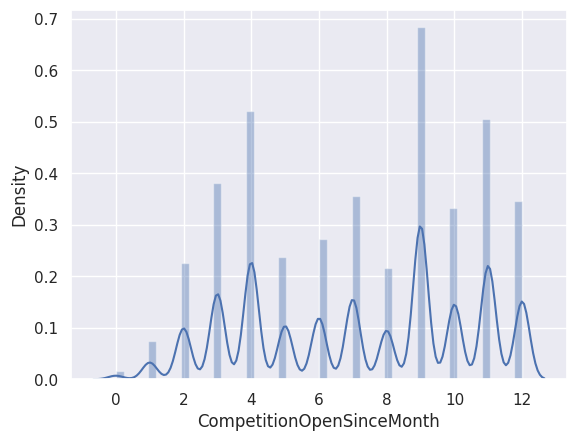

In [ ]:
# checking the distributions of these two columns

sns.distplot(new_df['CompetitionOpenSinceMonth'])

# the distribution of CompetitionOpenSinceMonth looks more or less like uniform distribution .

<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Density'>

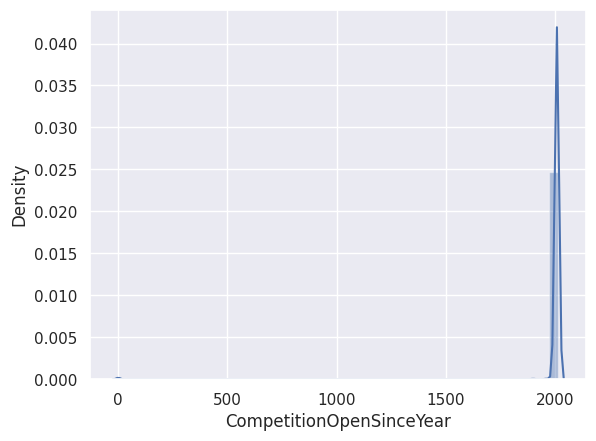

In [ ]:
sns.distplot(new_df['CompetitionOpenSinceYear'])
# highly left skewed

In [ ]:
new_df['CompetitionOpenSinceYear'].value_counts()
# Most of the observations have the CompetitionOpenSinceYear values in 2000s with peak in 2013

2013.0    75426
2012.0    74299
2014.0    63732
2005.0    56564
2010.0    51258
2009.0    49396
2011.0    49396
2008.0    48476
2007.0    43744
2006.0    42802
2015.0    35060
2002.0    24882
2004.0    19804
2003.0    16794
2001.0    14704
2000.0     9236
1999.0     7352
1990.0     4710
0.0        2642
1994.0     1884
1995.0     1700
1961.0      942
1998.0      942
1900.0      758
Name: CompetitionOpenSinceYear, dtype: int64

In [ ]:
# we can do imputations for these two features using two good options 1) random imputations ---univariate imputer  2) knn imputer -- multivariate imputer

In [ ]:
pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 7.2 MB/s eta 0:00:00


In [ ]:
# trying random imputations first


from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()
random_impute = pd.DataFrame(columns = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'] )
random_impute[['CompetitionOpenSinceMonth']] = rsi.fit_transform(new_df[['CompetitionOpenSinceMonth']])
rsi = RandomSampleImputer()
random_impute['CompetitionOpenSinceYear'] = rsi.fit_transform(new_df[['CompetitionOpenSinceYear']])



In [ ]:
random_impute.shape

(1017209, 2)

In [ ]:
random_impute.isnull().sum()

CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
dtype: int64

In [ ]:
# code for knn imputer.
# from sklearn.impute import KNNImputer
# kn = KNNImputer()
# knn_impute = pd.DataFrame(columns=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])



# knn_impute['CompetitionOpenSinceMonth'] = kn.fit_transform(new_df[['CompetitionOpenSinceMonth']])
# knn_impute['CompetitionOpenSinceYear'] = kn.fit_transform(new_df[['CompetitionOpenSinceYear']])


In [ ]:
new_df

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,0,1,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1
1017205,2,0,0,0,0,1,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1
1017206,2,0,0,0,0,1,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1
1017207,2,0,0,0,0,1,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1


In [ ]:
random_impute.shape

(1017209, 2)

In [ ]:
new_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis = 1,inplace = True)


In [ ]:
new_df = pd.concat([new_df,random_impute],axis = 1)

In [ ]:
new_df

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
0,5,5263,555,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,9.0,2008.0
1,5,6064,625,1,1,0,1,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,11.0,2007.0
2,5,8314,821,1,1,0,1,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,12.0,2006.0
3,5,13995,1498,1,1,0,1,c,c,620.0,0,NaN,NaN,NaN,2015,7,31,9.0,2009.0
4,5,4822,559,1,1,0,1,a,a,29910.0,0,NaN,NaN,NaN,2015,7,31,4.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,0,1,1,a,a,1900.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,6.0,2014.0
1017205,2,0,0,0,0,1,1,c,c,1880.0,0,NaN,NaN,NaN,2013,1,1,4.0,2006.0
1017206,2,0,0,0,0,1,1,a,c,9260.0,0,NaN,NaN,NaN,2013,1,1,12.0,2007.0
1017207,2,0,0,0,0,1,1,a,c,870.0,0,NaN,NaN,NaN,2013,1,1,9.0,2012.0


In [ ]:
new_df.isnull().sum()

DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
dtype: int64

In [ ]:
# Promo2SinceWeek and Promo2SinceYear have null values for observations where promo2 is not given(0) .We replaced these nulls with 0
# PromoInterval have null for same observations where promo2 is not given . but since it is a object dtype column , we replaced null with 'none' string
new_df.loc[new_df['Promo2SinceWeek'].isnull(),['Promo2SinceWeek','Promo2SinceYear']] = 0
new_df.loc[new_df['PromoInterval'].isnull(),['PromoInterval']] = 'None'

In [ ]:
new_df.isnull().sum()

DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
year                         0
month                        0
day                          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?



CompetitionDistance column had null values ,we replaced them with 0 as the associated values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear were nulls indicating the absence of any competition store. so we also replaced the two column associated with these null values in CompetitionDistance with 0 as well.

CompetitionOpenSinceMonth and CompetitionOpenSinceYear had missing values for observations where CompetitionDistance was not 0  , indicating the availability of Competition store .  We replaced the nulls for the two columns with other values of the columns using randomSampleimputation technique. this technique does not causes the change in the distribution of the column.

Promo2SinceWeek and Promo2SinceYear had null values for those rows where promo2 was not given . We replaced these null values with 0 and for promoInterval we replaced nulls with 'None'.

In [ ]:
# one hot encoding on storetype and assortment , stateholiday , promoInterval

# extract year month day from date

# missing value imputation and removal

# scaling

### 2. Handling Outliers

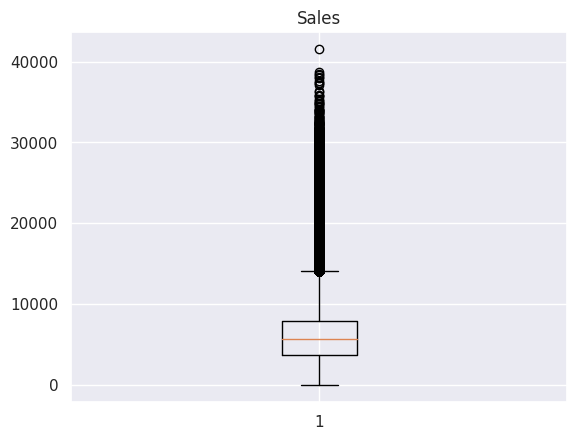

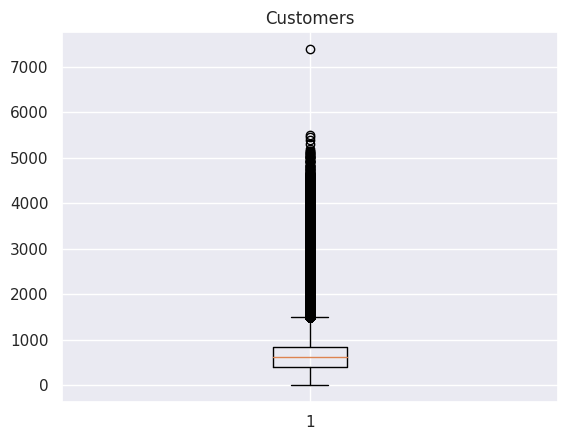

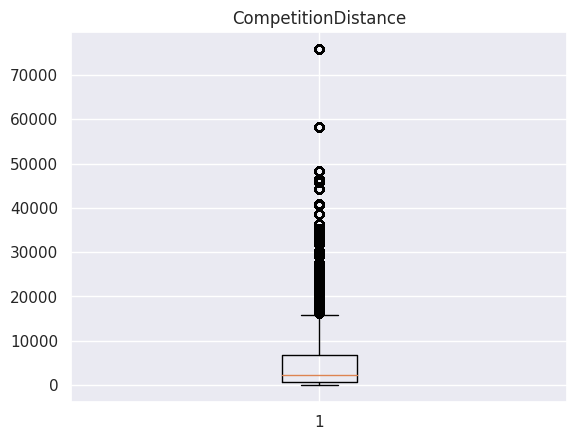

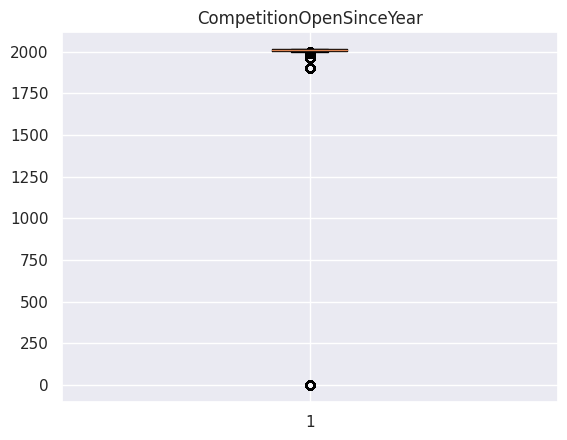

In [ ]:
# sales customers competitiondistance , competitionopensinceyear ,

for col in ["Sales",'Customers',"CompetitionDistance",'CompetitionOpenSinceYear']:
  plt.boxplot(new_df[col])
  plt.title(col)
  plt.show()

In [ ]:
new_df.shape

(1017209, 19)

In [ ]:
# Removing those observations where store is closed because sales = 0 in these observations , then removing the Open column as well as it is then containing only after this change.
# Then removing outliers in sales
new_df = new_df[~((new_df['Sales'] == 0) & (new_df['Open'] == 0))]


In [ ]:
new_df.shape

(844392, 19)

In [ ]:
new_df.drop('Open',axis = 1  , inplace = True)

In [ ]:
# removing outliers

for col in ["Sales",'Customers',"CompetitionDistance",'CompetitionOpenSinceYear']:
  mean = new_df[col].mean()
  std = new_df[col].std()
  print(col)
  print(mean)
  print(std)
  new_df = new_df.loc[((new_df[col] > (mean - 3*std )) & (new_df[col] < (mean+3*std)))]

Sales
6955.514290755952
3104.214680428348
Customers
737.788548116324
338.7422420167038
CompetitionDistance
5556.726793166469
7850.170700558988
CompetitionOpenSinceYear
2000.8087296795634
125.47074976103742


In [ ]:
new_df.shape

(798523, 18)

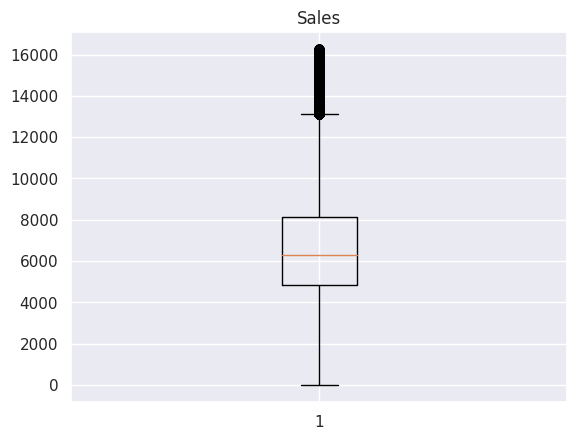

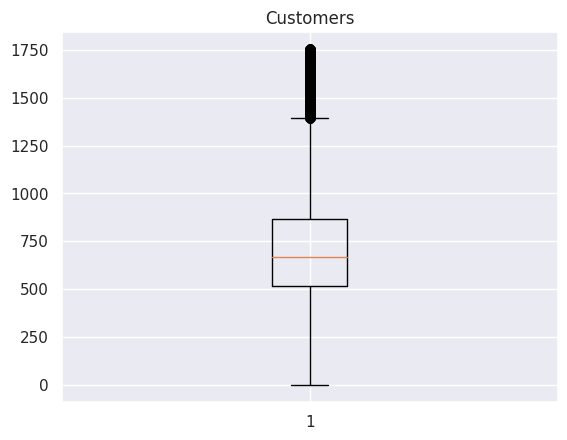

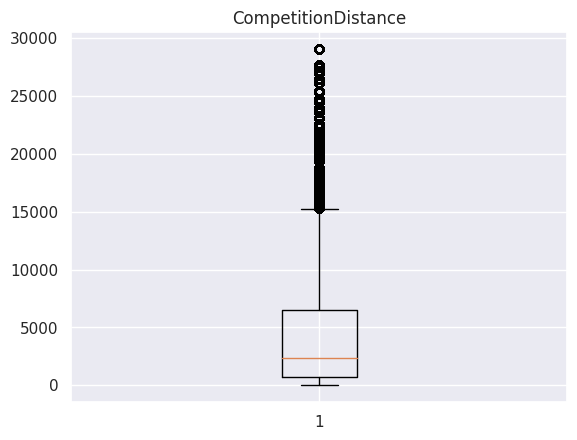

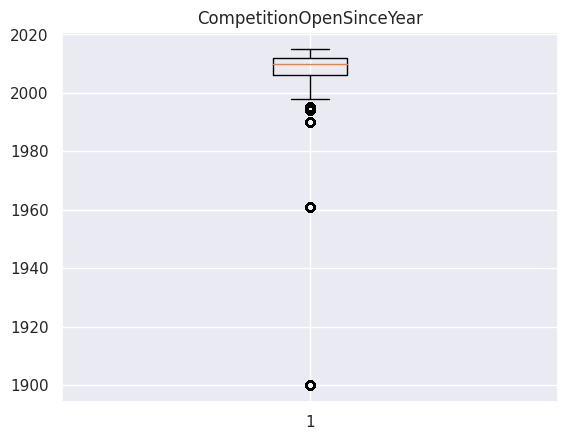

In [ ]:
for col in ["Sales",'Customers',"CompetitionDistance",'CompetitionOpenSinceYear']:
  plt.boxplot(new_df[col])
  plt.title(col)
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used the capping technique to remove the outliers values beyond 3 standard deviations from the mean.

### 3. Categorical Encoding

In [ ]:
categorical_col

['StoreType', 'Assortment', 'PromoInterval']

In [ ]:
for i in categorical_col:
  print(new_df[i].value_counts())

a    429815
d    252310
c    109219
b      7179
Name: StoreType, dtype: int64
a    429553
c    365382
b      3588
Name: Assortment, dtype: int64
None                384362
Jan,Apr,Jul,Oct     237491
Feb,May,Aug,Nov      96700
Mar,Jun,Sept,Dec     79970
Name: PromoInterval, dtype: int64


In [ ]:
new_df.shape

(798523, 18)

In [ ]:
dummy_df = pd.get_dummies(new_df[categorical_col],drop_first = True)

In [ ]:
dummy_df

,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,1,0,0,1,0,0,1
5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1016770,1,0,0,1,0,0,0,1
1016776,1,0,0,0,0,0,0,1
1016863,1,0,0,1,0,1,0,0
1017042,1,0,0,1,0,0,0,1


In [ ]:
new_df.drop(categorical_col , axis = 1 , inplace = True)

In [ ]:
new_df = pd.concat([new_df , dummy_df],axis = 1)

In [ ]:
new_df.shape

(798523, 23)

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
new_df.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,year,month,day,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
0,5,5263,555,1,0,1,1270.0,0,0.0,0.0,2015,7,31,9.0,2008.0,0,1,0,0,0,0,0,1
1,5,6064,625,1,0,1,570.0,1,13.0,2010.0,2015,7,31,11.0,2007.0,0,0,0,0,0,1,0,0
2,5,8314,821,1,0,1,14130.0,1,14.0,2011.0,2015,7,31,12.0,2006.0,0,0,0,0,0,1,0,0
3,5,13995,1498,1,0,1,620.0,0,0.0,0.0,2015,7,31,9.0,2009.0,0,1,0,0,1,0,0,1
5,5,5651,589,1,0,1,310.0,0,0.0,0.0,2015,7,31,12.0,2013.0,0,0,0,0,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

We did one hot encoding on the categorical columns using the pd.get_dummies function . This is needed because the values present in these columns were of cardinal nature which do not holding any ranking order with one another . Hence ordinal encoding was not a viable option to implement. Further to make some reduction in dimensionality and reduce multicollinearity , we also took care dummy_variable trap by using drop_first = True.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<Axes: >

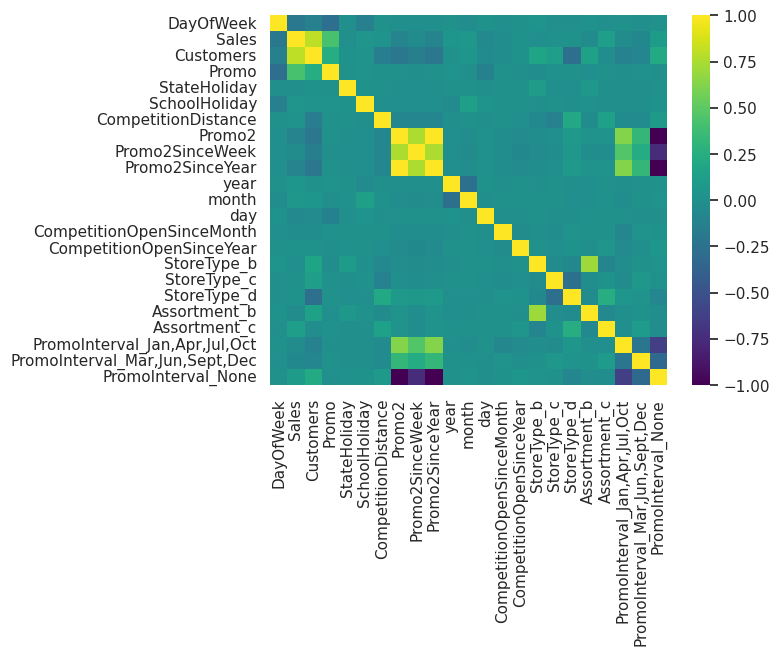

In [ ]:
sns.heatmap(new_df.corr(),cmap = 'viridis')

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# promo2 , promo2sinceWeek,promo2sinceyear are highly negatively correlated with promo_interval_none.
# dropping promosince week and promointervalNone

new_df.drop(['Promo2SinceWeek','PromoInterval_None'],axis = 1 , inplace = True)

##### What all feature selection methods have you used  and why?

We used the correlation based feature selection to remove highly correlated features .We found the 'Promo2SinceWeek','PromoInterval_None' are highly correlated with other features like promosinceyear promo2 and promoInterval_janaprjulyoct etc . hence we removed them .

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes some numerical columns needs to transformed because they show deviations from normal distribution . Transformation helps make feature more alike normal distribution which cause the regression algorithms to give better performance.

In [ ]:
# Transform Your data
numerical_col = [col for col in numerical_col if col not in ['Open' , 'Promo' , 'StateHoliday','SchoolHoliday','Promo2','Promo2SinceWeek']]

In [ ]:
new_df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Promo2SinceYear',
       'year', 'month', 'day', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_pow = pt.fit_transform(new_df[numerical_col])

In [ ]:
new_df[numerical_col] = df_pow

In [ ]:
new_df.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceYear,year,month,day,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,0.866821,5263,-0.494218,1,0,1,-0.414387,0,-1.038041,1.085798e-13,0.455051,1.609997,0.543115,-0.210277,0,1,0,0,0,0,0
1,0.866821,6064,-0.198117,1,0,1,-0.898094,1,0.963097,1.085798e-13,0.455051,1.609997,1.162107,-0.419681,0,0,0,0,0,1,0
2,0.866821,8314,0.510654,1,0,1,1.395267,1,0.963243,1.085798e-13,0.455051,1.609997,1.471126,-0.624388,0,0,0,0,0,1,0
3,0.866821,13995,2.225175,1,0,1,-0.849737,0,-1.038041,1.085798e-13,0.455051,1.609997,0.543115,0.003932,0,1,0,0,1,0,0
5,0.866821,5651,-0.346933,1,0,1,-1.232460,0,-1.038041,1.085798e-13,0.455051,1.609997,1.471126,0.910992,0,0,0,0,0,0,0


In [ ]:
X = new_df.drop('Sales',axis = 1)
y = new_df['Sales']

### 6. Data Scaling

In [ ]:
# Data scaling is not needed after powerTransformation as it automatically processes  the scaling of the transformed columns.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(X , y ,test_size = 0.2,random_state = 10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(638818, 20)
(159705, 20)
(638818,)
(159705,)


##### What data splitting ratio have you used and why?

We have used the 80-20 ratio for train - test split because it is standard practice plus we have a suffienctly large data as well.

### 9. Handling Imbalanced Dataset

We are doing the regression problem so it is not a issue here .

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation -- Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fit the Algorithm
lr.fit(xtrain , ytrain)
# Predict on the model
ypred = lr.predict(xtest)

In [ ]:
print(lr.score(xtrain , ytrain))
print(lr.score(xtest , ytest))

0.7988288553653282
0.8002444801026507


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
mse = mean_squared_error(ytest , ypred )
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
n = xtest.shape[0]
p = xtest.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

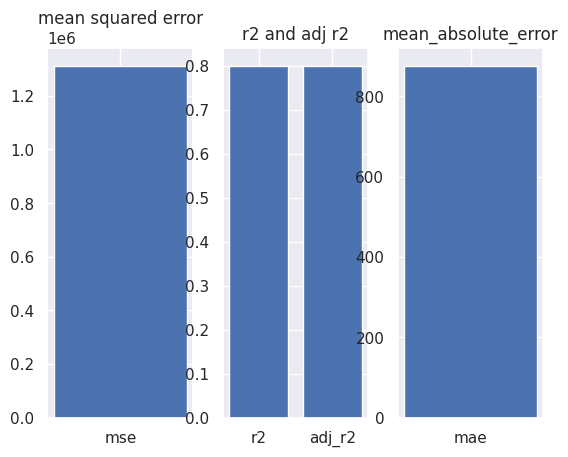

In [ ]:

plt.subplot(1,3 ,1)
plt.bar('mse',mse)
plt.title('mean squared error')
plt.subplot(1,3,2)
names = ['r2' , 'adj_r2']
plt.bar(names , [ r2 , adjusted_r2])
plt.title('r2 and adj r2')
plt.subplot(1,3,3)
plt.bar('mae' , mae)
plt.title('mean_absolute_error')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

# Fit the Algorithm
scorescv = cross_val_score(lr , X , y , cv = 5 , scoring = 'r2')

print(scorescv)
print(scorescv.mean())

[0.78976613 0.79883156 0.79977974 0.79760744 0.79764633]
0.7967262369263471


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# implementation of lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
ridge = Ridge()
params = {'alpha' : [0.001,0.01,0.1,1,10,100,1000]}
grid = GridSearchCV(lasso,param_grid = params , scoring = 'r2' , cv = 5)
grid1 = GridSearchCV(ridge,param_grid = params , scoring = 'r2' , cv = 5)
grid.fit(X,y)
grid1.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

In [ ]:
best_lasso_model = grid.best_estimator_
best_lasso_alpha = grid.best_params_['alpha']
best_ridge_model = grid1.best_estimator_
best_ridge_alpha = grid1.best_params_['alpha']

In [ ]:
print(best_lasso_model)
print(best_lasso_alpha)
print(best_ridge_model)
print(best_ridge_alpha)

Lasso(alpha=1)
1
Ridge(alpha=0.001)
0.001


In [ ]:
# metrics for best lasso model
best_lasso_model.fit(X,y)
ypred = best_lasso_model.predict(xtest)
mse = mean_squared_error(ytest , ypred )
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
n = xtest.shape[0]
p = xtest.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(mse)
print(mae)
print(r2)
print(adjusted_r2)

1330465.5362600817
882.3974914180981
0.7975535398022116
0.7975281839168131


In [ ]:
# metrics for best ridge model
best_ridge_model.fit(X,y)
ypred = best_ridge_model.predict(xtest)
mse = mean_squared_error(ytest , ypred )
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
n = xtest.shape[0]
p = xtest.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(mse)
print(mae)
print(r2)
print(adjusted_r2)

1325041.3897078186
880.5762720072627
0.7983788894555265
0.7983536369429962


### ML Model - 3

In [ ]:
# ML Model - 3 Implementation--DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Fit the Algorithm
dtr.fit(xtrain , ytrain)
# Predict on the model
ypred = dtr.predict(xtest)

In [ ]:
dtr.score(xtest,ytest)

0.9228297971161632

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

mse = mean_squared_error(ytest , ypred)
mae = mean_absolute_error(ytest , ypred)
r2 = r2_score(ytest , ypred)
n = xtest.shape[0]
p = xtest.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print('mse = ' , mse)
print('mae = ' , mae)
print('r2 = ' , r2)
print('adjusted r2 = ' , adj_r2)

mse =  507157.770320278
mae =  486.8809179424564
r2 =  0.9228297971161632
adjusted r2 =  0.922820131751708


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'max_depth' : [6,8] , 'min_samples_leaf': [50 , 100] , 'min_samples_split' : [100 , 200] }
dtr = DecisionTreeRegressor()
grid = GridSearchCV(dtr,params, scoring = 'r2' , cv = 5)
# Fit the Algorithm
grid.fit(X,y)
# Predict on the model
ypred = grid.predict(xtest)
print('r2 score = ',r2_score(ytest , ypred))
print('mse = ' , mean_squared_error(ytest , ypred))
print('mae = ' , mean_absolute_error(ytest , ypred))

r2 score =  0.8264837516896322
mse =  1140337.984336922
mae =  802.4076329180418


In [ ]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_leaf=50, min_samples_split=100)

In [ ]:
dtr = grid.best_estimator_

dtr.feature_importances_

array([7.06549037e-03, 8.04570470e-01, 5.52244160e-02, 0.00000000e+00,
       2.23484396e-06, 3.62534677e-02, 1.89274780e-03, 3.57918750e-03,
       0.00000000e+00, 4.23473650e-04, 0.00000000e+00, 1.78380233e-04,
       1.89379438e-04, 2.92264545e-03, 0.00000000e+00, 7.16389523e-02,
       1.47723394e-02, 3.35949965e-04, 9.50865304e-04, 0.00000000e+00])

##### Which hyperparameter optimization technique have you used and why?

we have used gridsearchcv which allows cross validation along with best hyperparameters search algorithm.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have used the r2 score which tells how better the model is compared to mean based model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We see that decision tree are giving the best results among linear regression , lasso and ridge . so we choose the decision tree model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***